In [10]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("D:/GL/Total DS Codes2/Pred Model/Assignment Project/Final Files/cubic_zirconia.csv")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print("Top 5 rows",data.head())

Top 5 rows    carat        cut color clarity  depth  table     x     y     z  price
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779


In [3]:
        print(data.isna().sum())
        print(data.isnull().sum())
        cust_data_dropna=data.dropna()
        print(cust_data_dropna.isna().sum())
        cust_copy=data.drop(['cut','color','clarity'] , axis=1)
        cust_dropna_copy=cust_data_dropna.drop(['cut','color','clarity'] , axis=1)
        print("shape\n",cust_copy.shape) # see the shape of the cust_copy
        print("Info\n",cust_copy.info())
        print("Mean\n",cust_copy.mean())
        print("Mode\n",cust_copy.mode())
        print("median\n",cust_copy.median())
        print("cust_copy_quantile(25%):\n",cust_copy.quantile(q=0.25))
        print("cust_copy_quantile(50%):\n",cust_copy.quantile(q=0.50))
        print("cust_copy_quantile(75%):\n",cust_copy.quantile(q=0.75))
        print("describe\n",cust_copy.describe())
#         print("IQR"+colname+"\n",cust_copy[colname2].quantile(0.75) - cust_copy[colname2].quantile(0.25))
        print("IQR\n",cust_copy.quantile(0.75) - cust_copy.quantile(0.25))
        Q1 = cust_copy.quantile(0.25)
        Q3 = cust_copy.quantile(0.75)
        IQR = Q3 - Q1
        print("Outlier sum\n",((cust_copy < (Q1 - 1.5 * IQR)) | (cust_copy > (Q3 + 1.5 * IQR))).sum())
        print("Range\n",cust_copy.max() - cust_copy.min())
        print("variance\n",cust_copy.var())
        print("std\n",cust_copy.std())
        print("cov\n",cust_copy.cov())
        print("corr\n",cust_copy.corr())
        print("skew\n",cust_copy.skew())
        print("kurt\n",cust_copy.kurt())

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64
shape
 (26967, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 7 columns):
carat    26967 non-null float64
depth    26270 non-null float64
table    26967 non-null float64
x        26967 non-null float64
y        26967 non-null float64
z        26967 non-null float64
price    26967 non-null int64
dtypes: float64(6), int64(1)
memory usage: 1.4 MB
Info
 None
Mean
 carat       0.798375
depth      61.745147
table      57.456080
x           5.729854
y           5.733569
z          

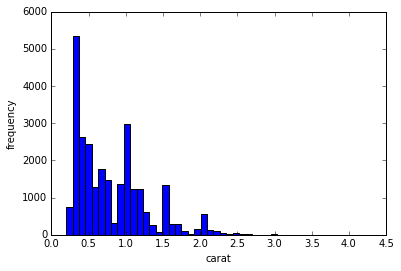

C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


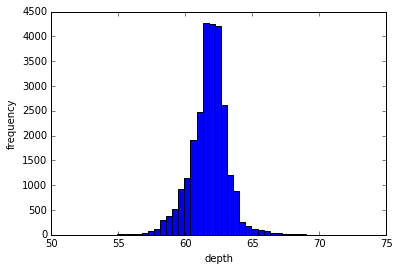

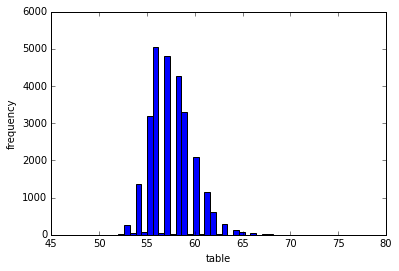

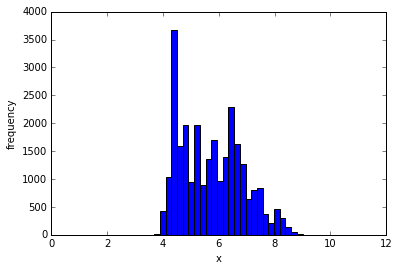

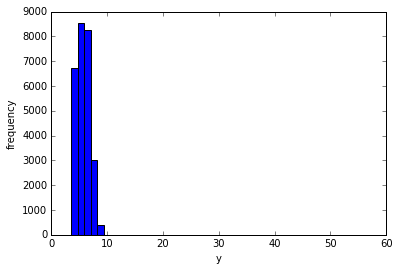

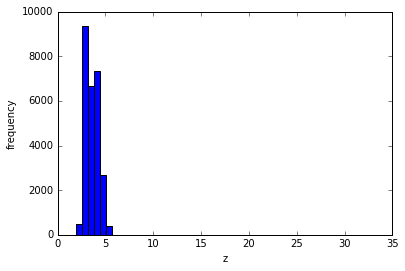

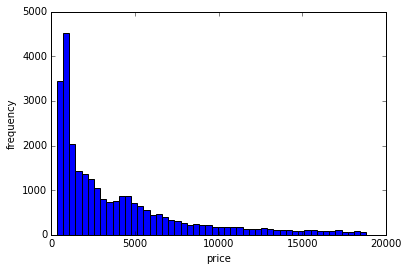

In [4]:
def histplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            plt.hist(data.iloc[:,i], bins=50)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
histplot(cust_copy)

In [5]:
def valcount(data,colname):
    print("value count {} freqrange {}".format(colname,data[colname].value_counts(normalize=True)))

valcount(data,'cut')
valcount(data,'color')
valcount(data,'clarity')

value count cut freqrange Ideal        0.401083
Premium      0.255831
Very Good    0.223607
Good         0.090518
Fair         0.028961
Name: cut, dtype: float64
value count color freqrange G    0.209923
E    0.182334
F    0.175362
H    0.152112
D    0.124003
I    0.102755
J    0.053510
Name: color, dtype: float64
value count clarity freqrange SI1     0.243668
VS2     0.226165
SI2     0.169652
VS1     0.151778
VVS2    0.093855
VVS1    0.068194
IF      0.033152
I1      0.013535
Name: clarity, dtype: float64


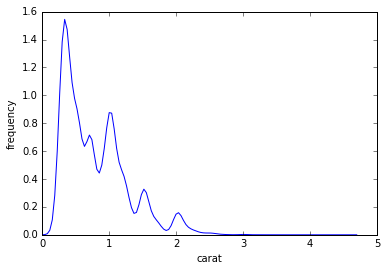

C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


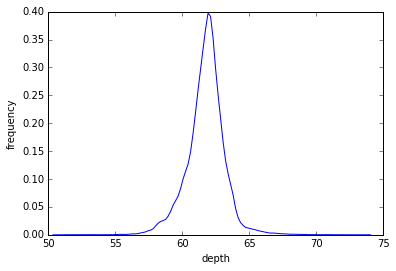

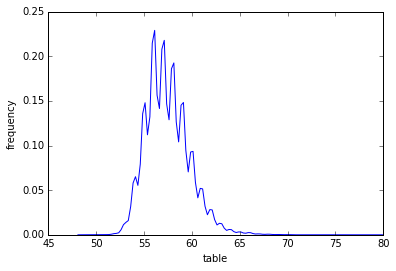

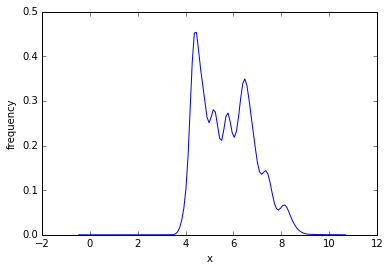

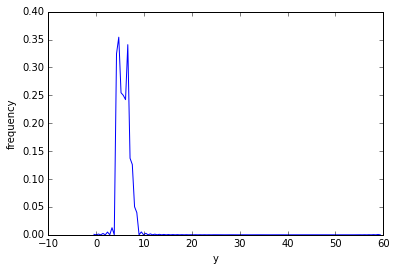

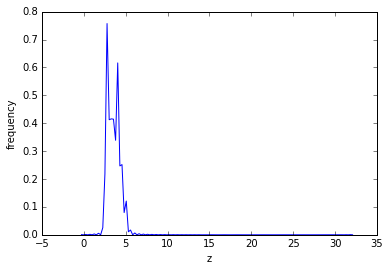

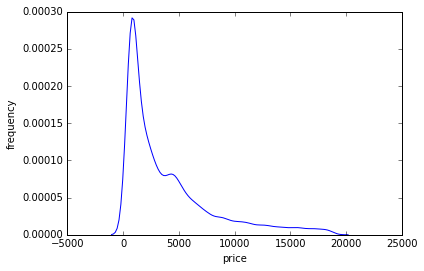

In [6]:
def distplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            sns.distplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
distplot(cust_copy)


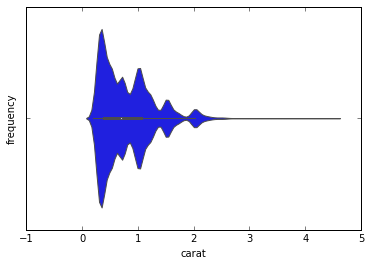

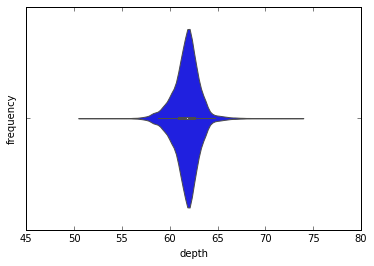

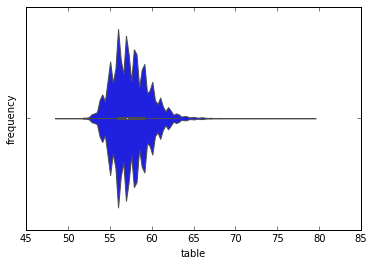

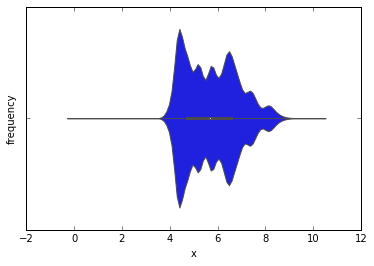

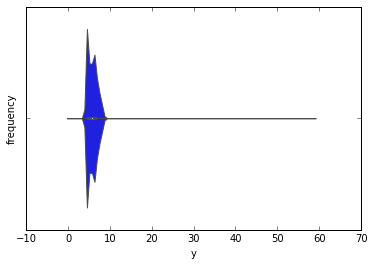

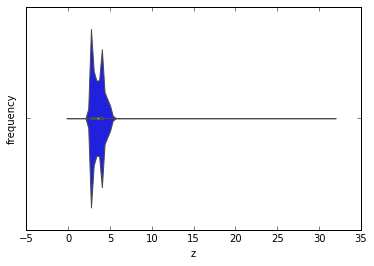

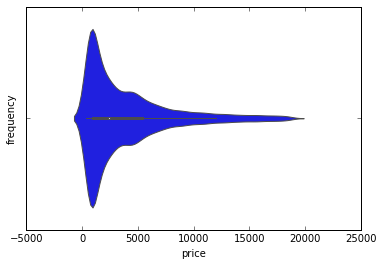

In [7]:
def violinplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            sns.violinplot(data.iloc[:,i], hist=False)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
violinplot(cust_copy)

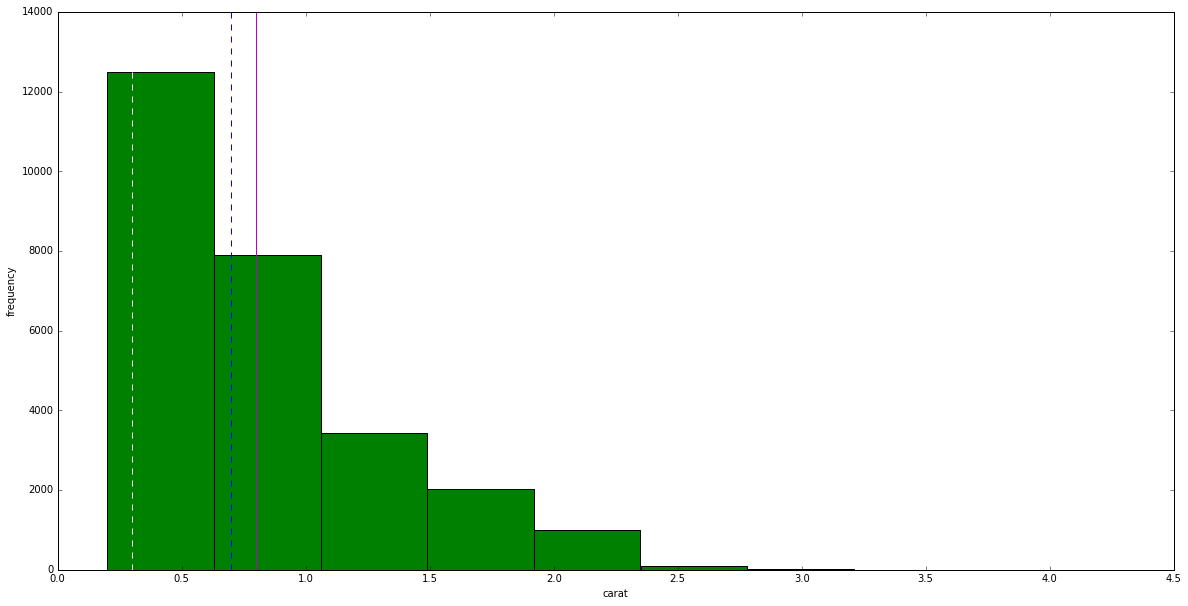

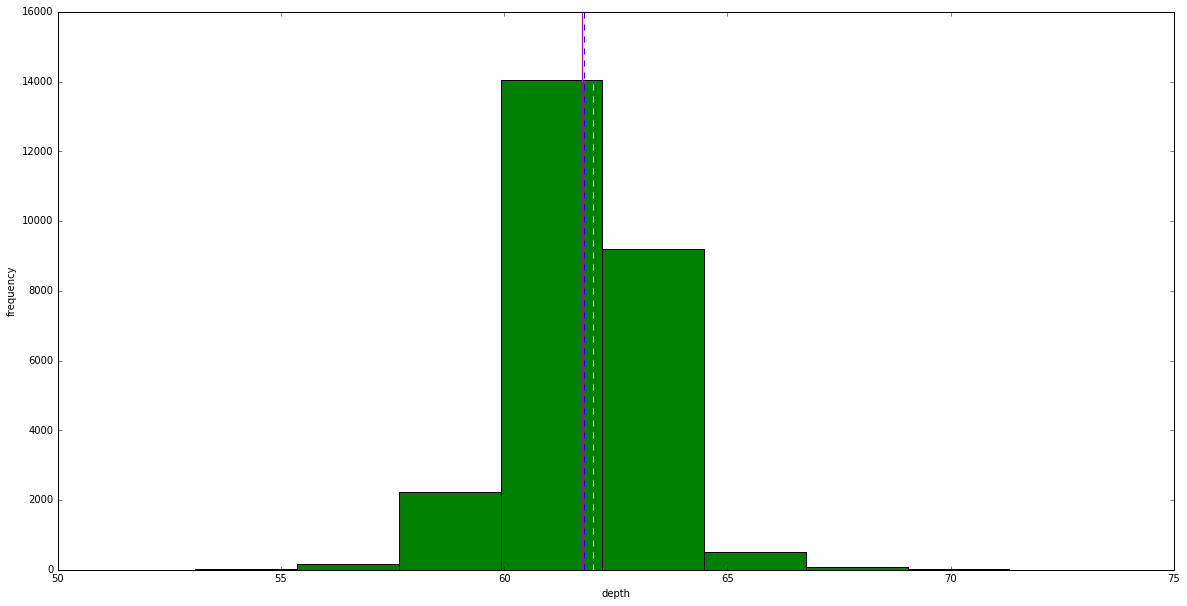

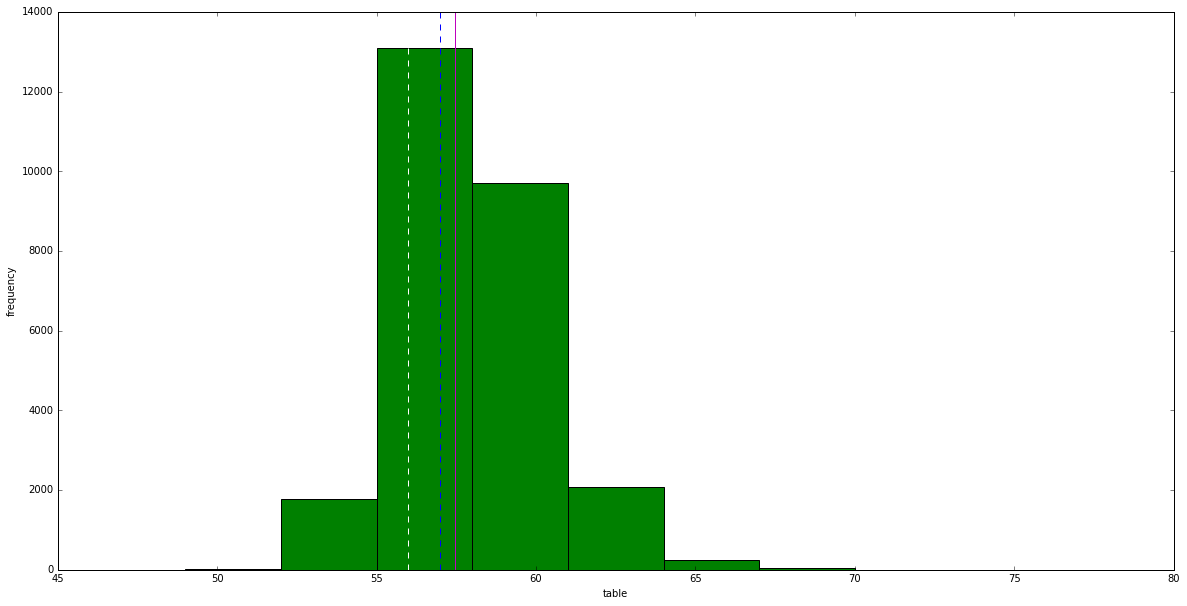

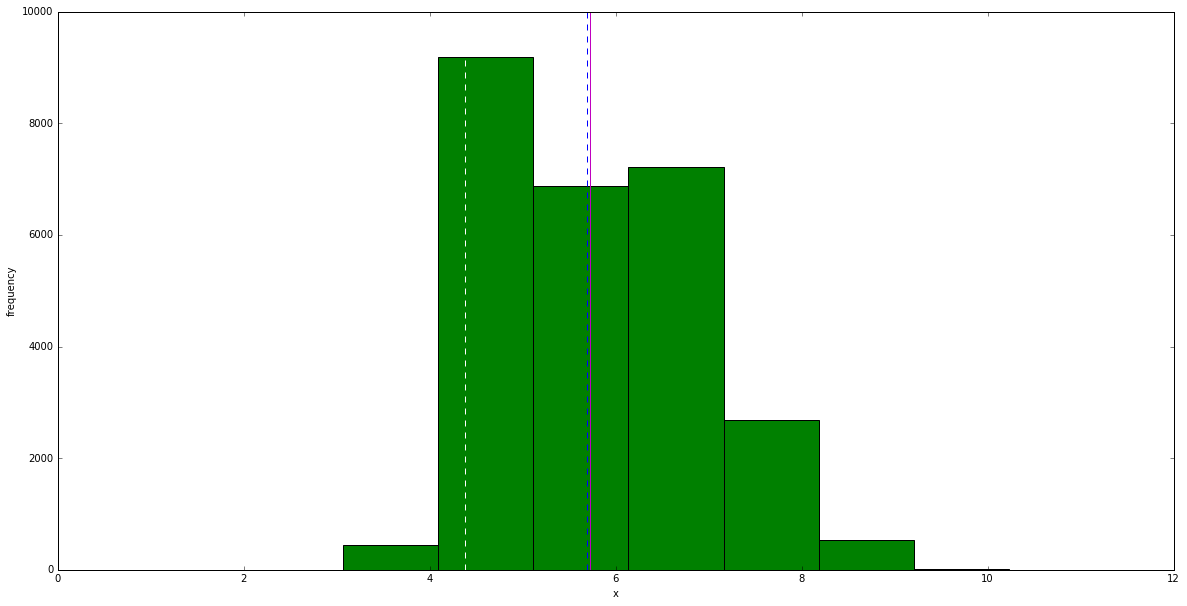

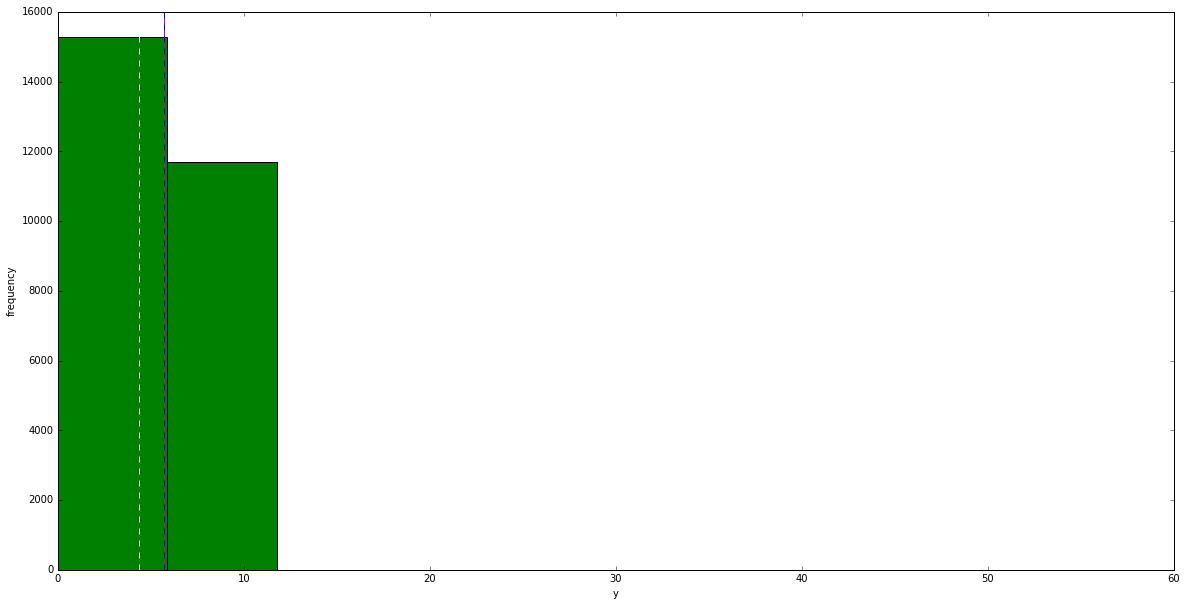

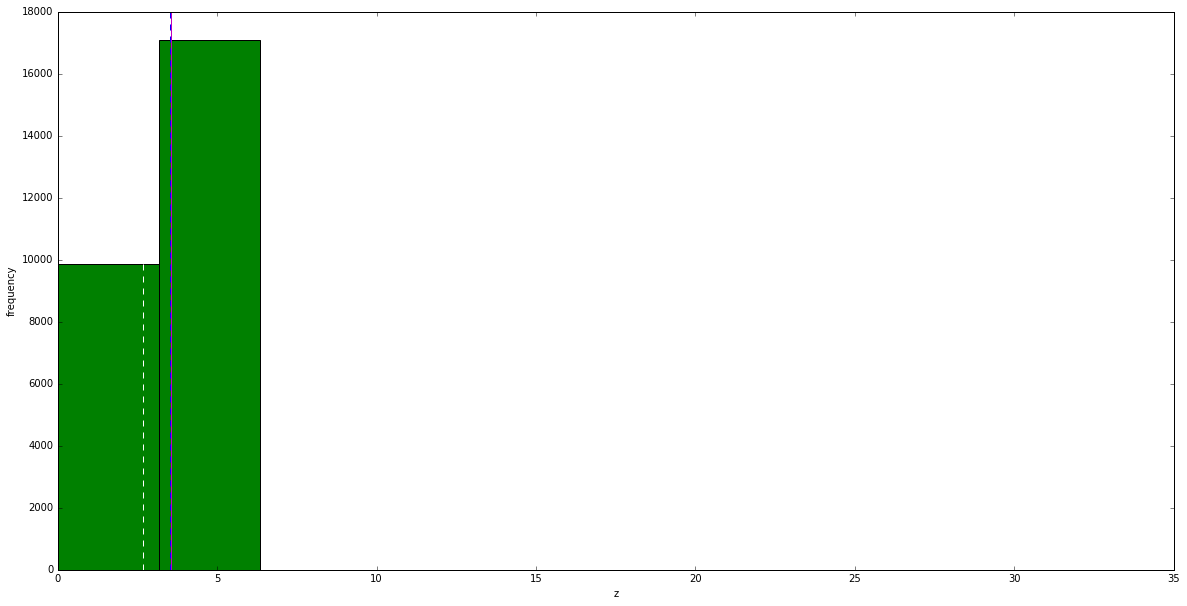

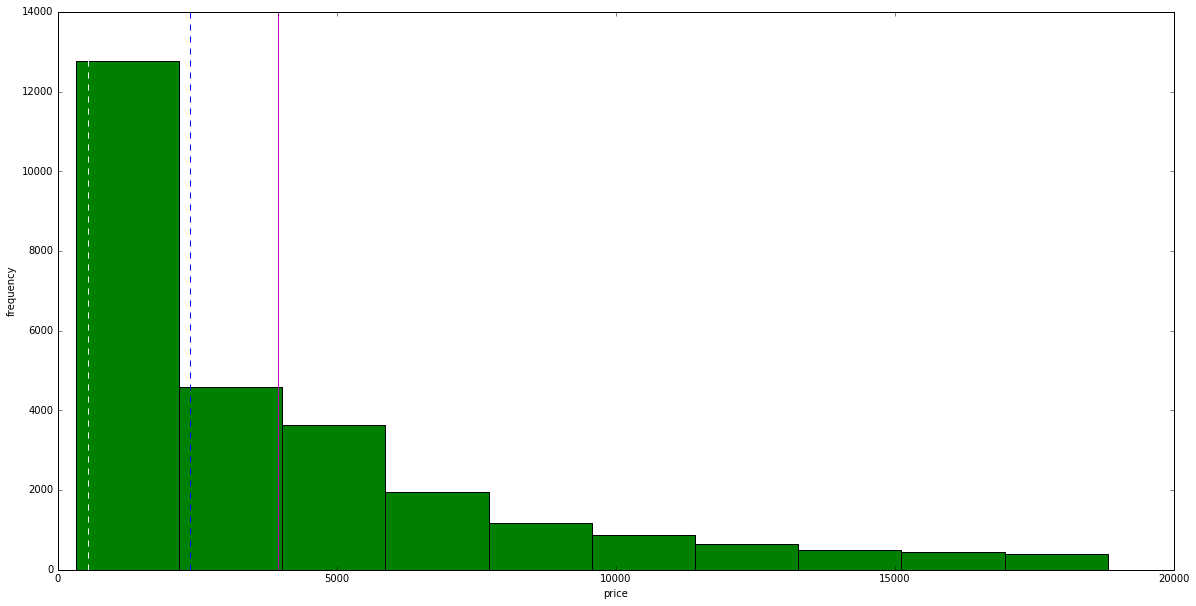

In [8]:
def closelookplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            plt.figure(figsize=(20,10)) # makes the plot wider
            plt.hist(data.iloc[:,i], color='g') # plots a simple histogram
            plt.axvline(data.iloc[:,i].mean(), color='m', linewidth=1)
            plt.axvline(data.iloc[:,i].median(), color='b', linestyle='dashed', linewidth=1)
            plt.axvline(data.iloc[:,i].mode()[0], color='w', linestyle='dashed', linewidth=1)
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
closelookplot(cust_copy)

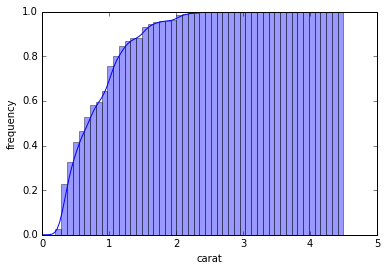

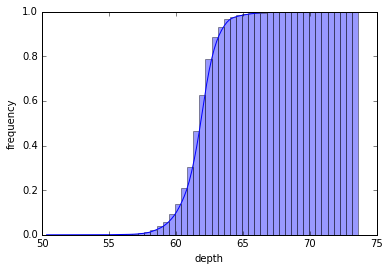

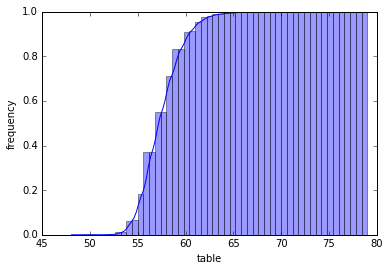

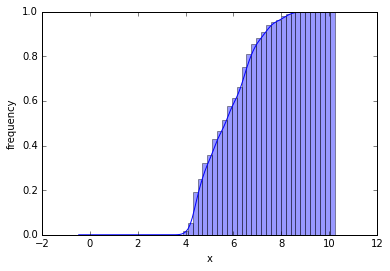

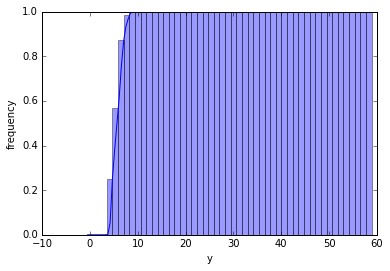

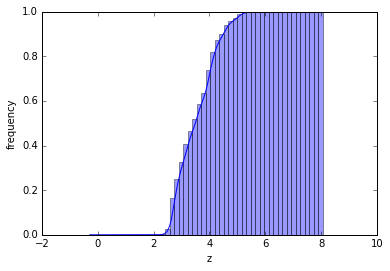

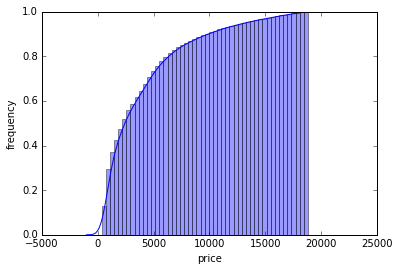

In [9]:
def cumuplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            sns.distplot(data.iloc[:,i], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
            plt.xlabel(colnames[i])
            plt.ylabel('frequency')
            plt.show()
cumuplot(cust_dropna_copy)

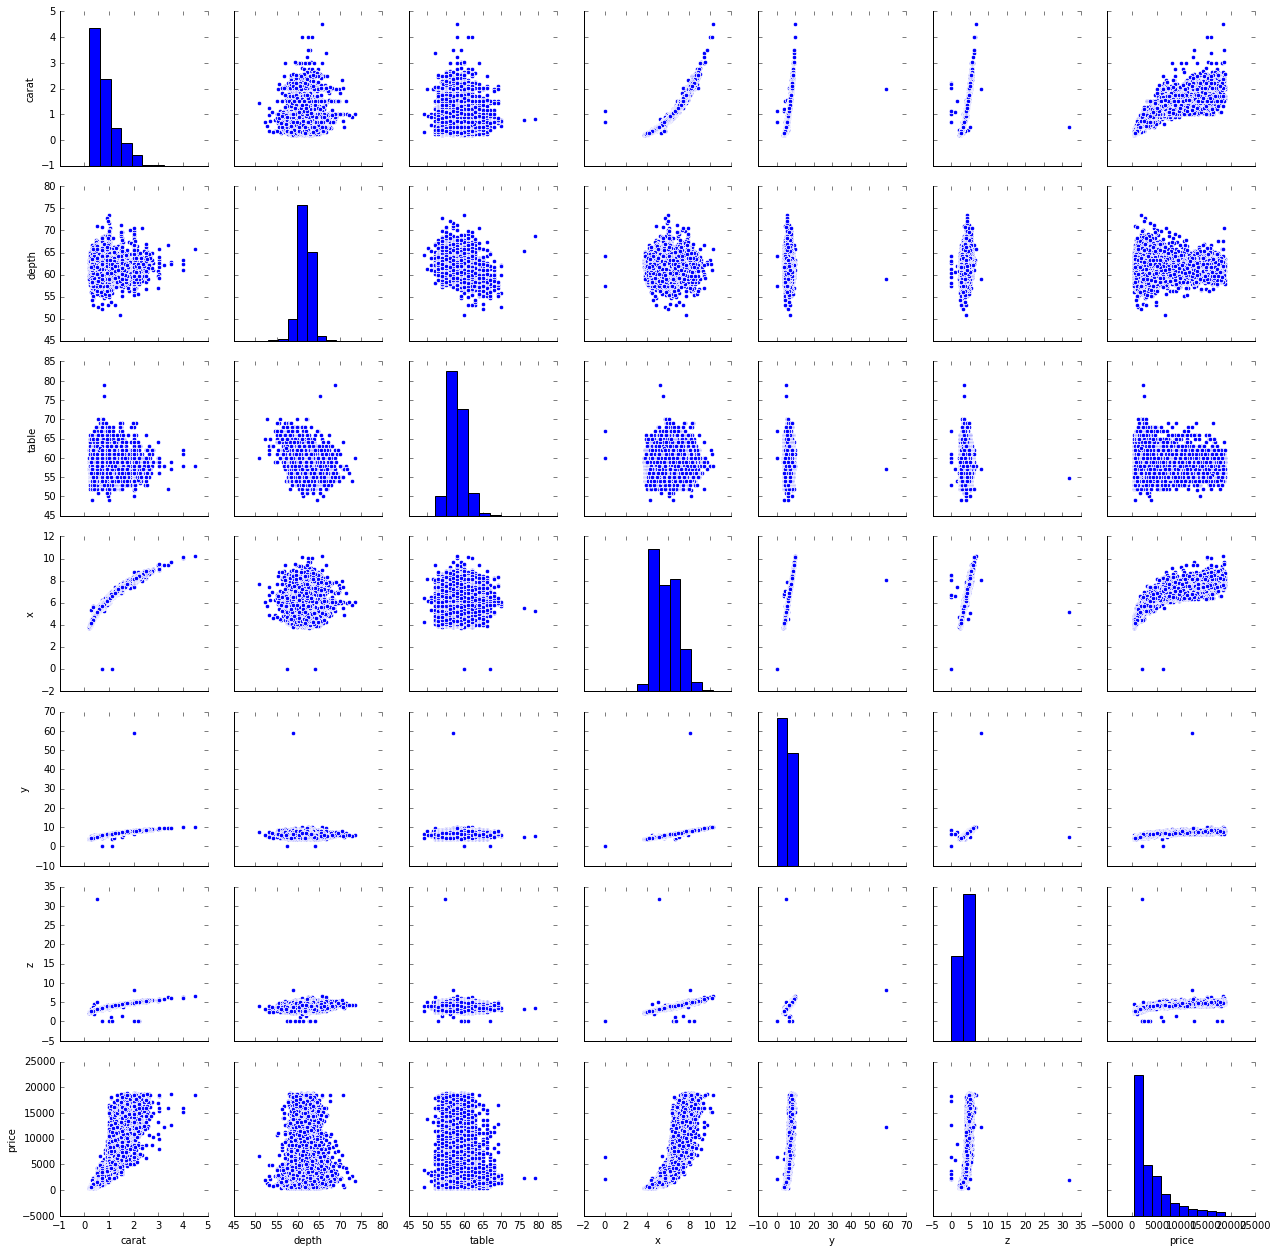

In [10]:
sns.pairplot(data)
plt.show()

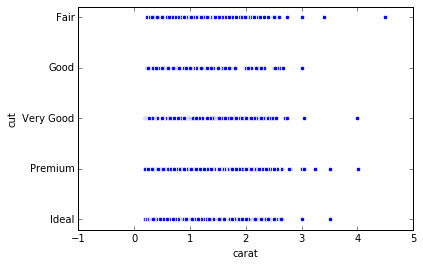

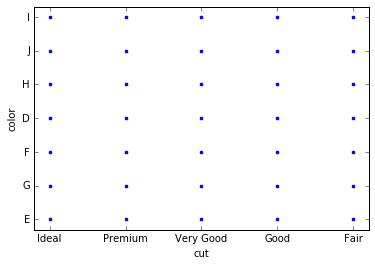

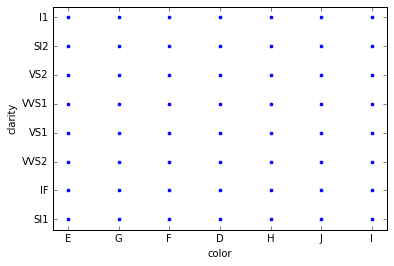

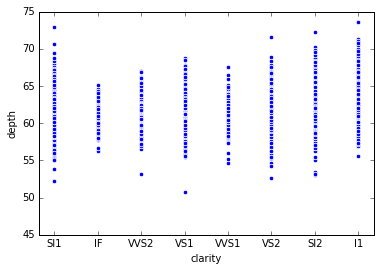

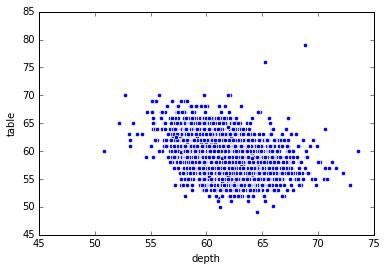

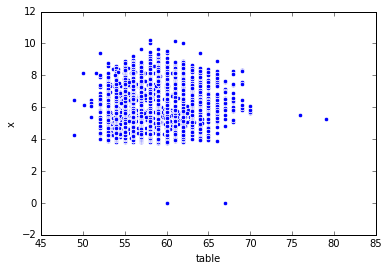

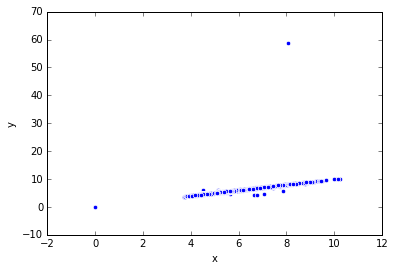

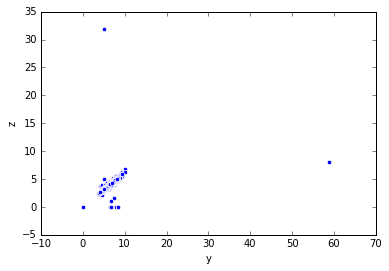

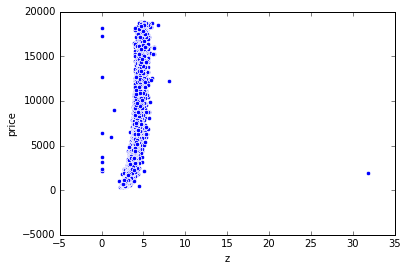

In [11]:
def multiscatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,9):
            sns.scatterplot(data.iloc[:,i], data.iloc[:,i+1]) 
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
multiscatplot(data)

          carat     depth     table         x         y         z     price
carat  1.000000  0.035364  0.181685  0.976368  0.941071  0.940640  0.922416
depth  0.035364  1.000000 -0.298011 -0.018715 -0.024735  0.101624 -0.002569
table  0.181685 -0.298011  1.000000  0.196206  0.182346  0.148944  0.126942
x      0.976368 -0.018715  0.196206  1.000000  0.962715  0.956606  0.886247
y      0.941071 -0.024735  0.182346  0.962715  1.000000  0.928923  0.856243
z      0.940640  0.101624  0.148944  0.956606  0.928923  1.000000  0.850536
price  0.922416 -0.002569  0.126942  0.886247  0.856243  0.850536  1.000000


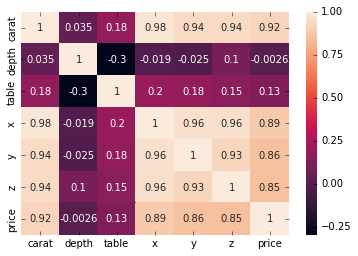

In [12]:
print(data.corr())
sns.heatmap(data.corr(), annot=True)

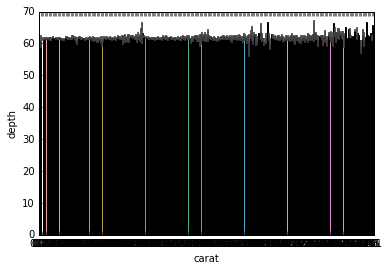

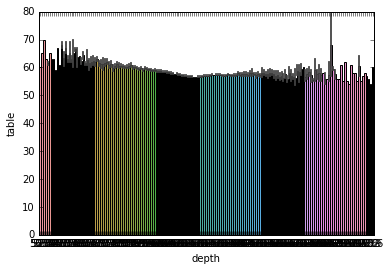

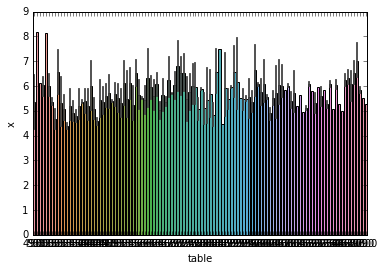

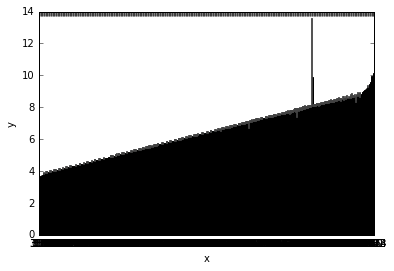

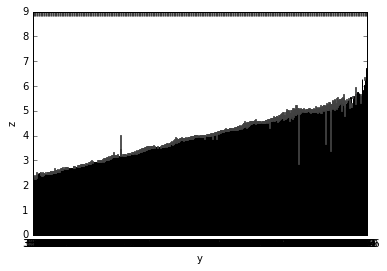

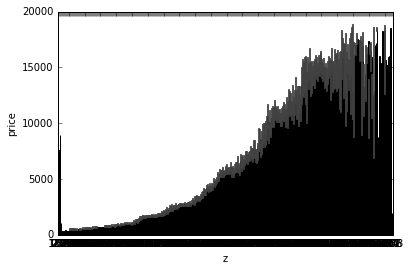

In [13]:
def barplot(data):
        colnames=list(data.columns.values)
        for i in range(0,6):
            sns.barplot(x=colnames[i], y=colnames[i+1], data=data)
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
barplot(cust_copy)

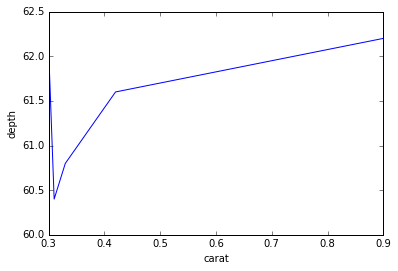

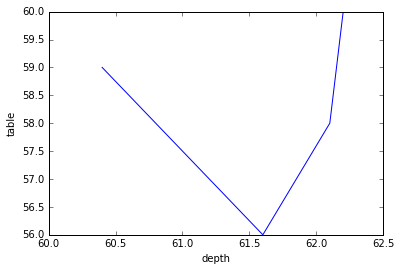

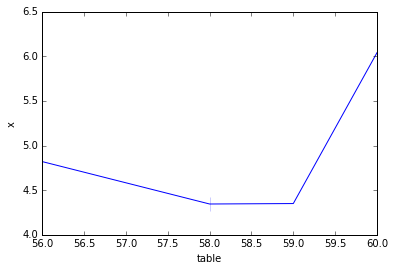

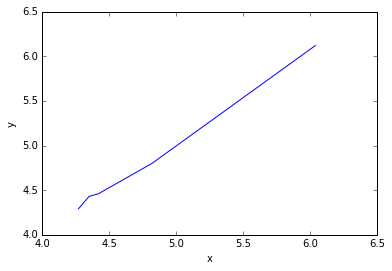

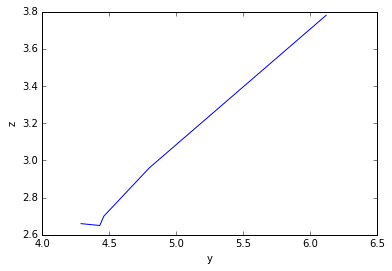

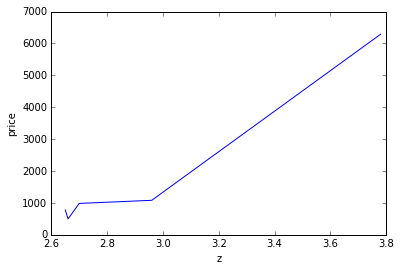

In [14]:
def lineplot(data):
        colnames=list(data.columns.values)
        for i in range(0,6):
            sns.lineplot(x=colnames[i], y=colnames[i+1], data=data.head())
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
lineplot(cust_copy)

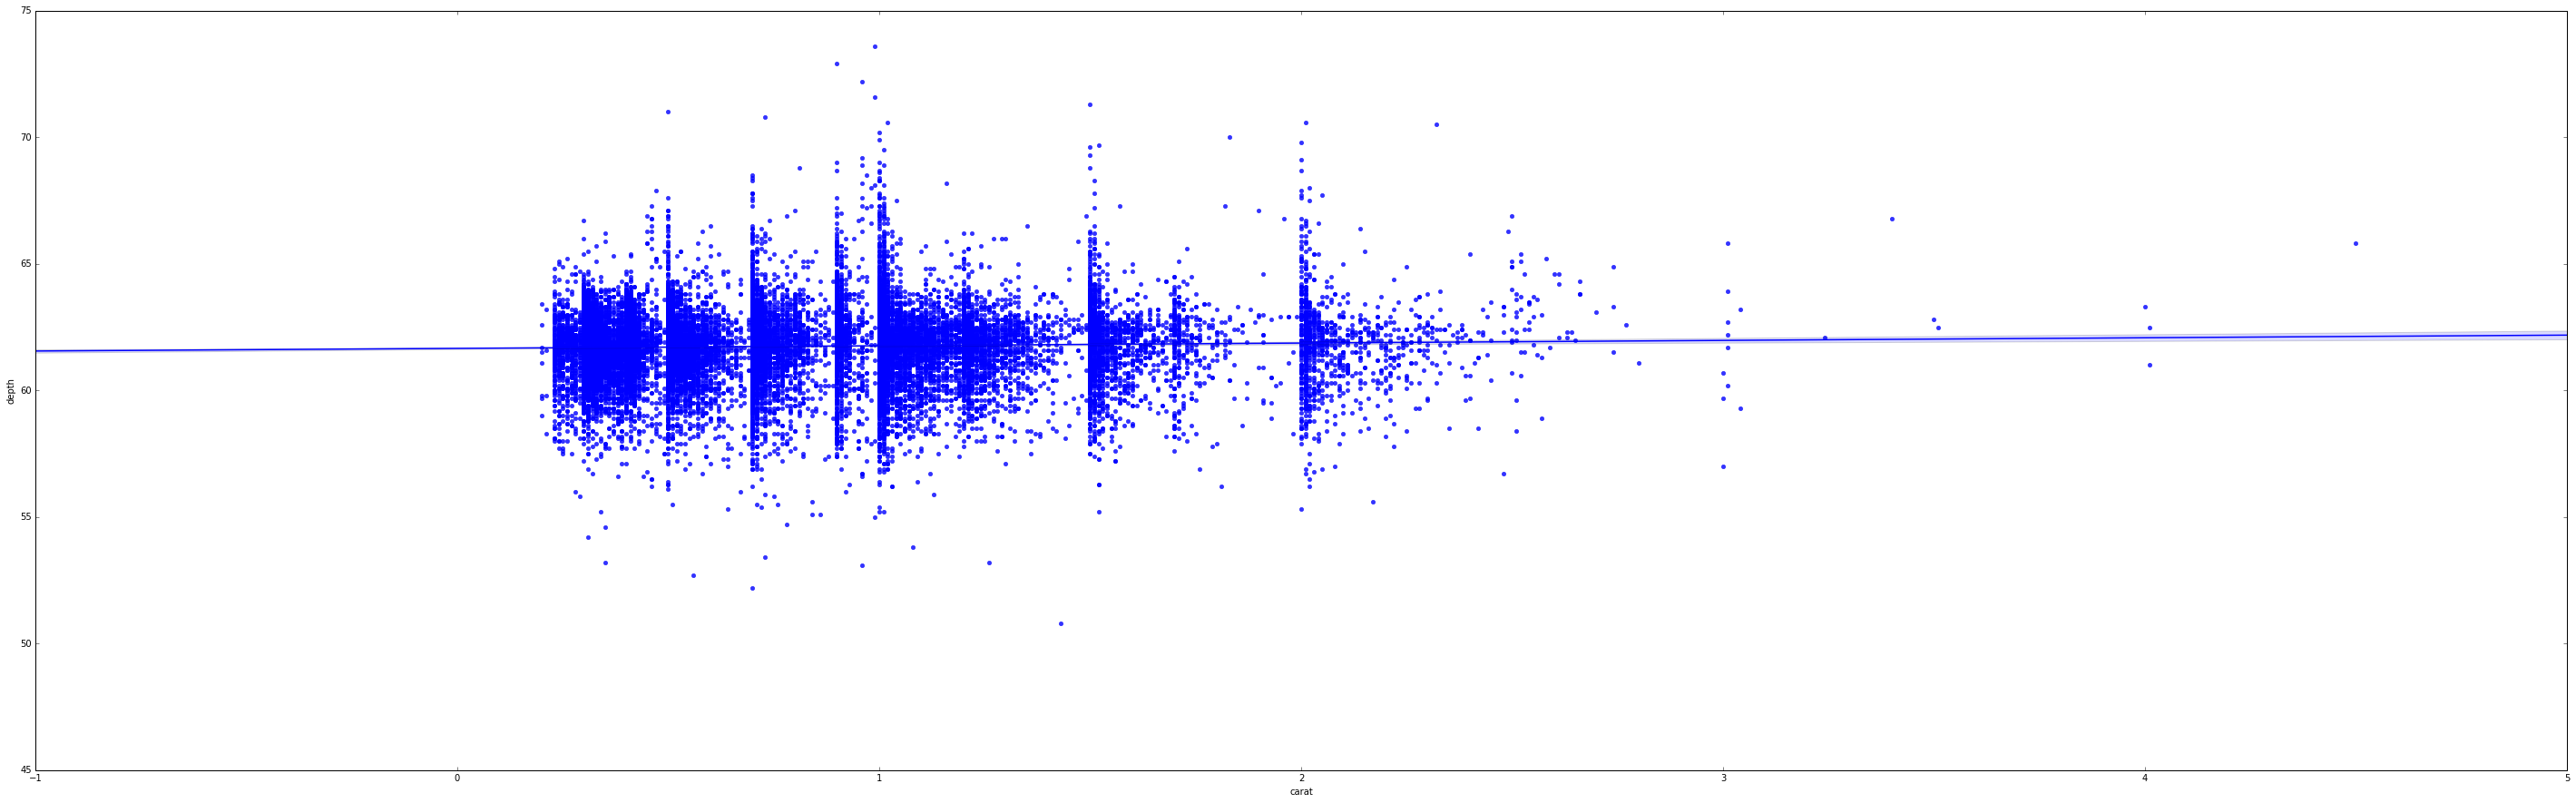

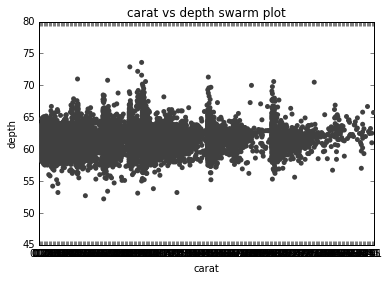

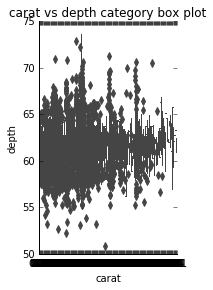

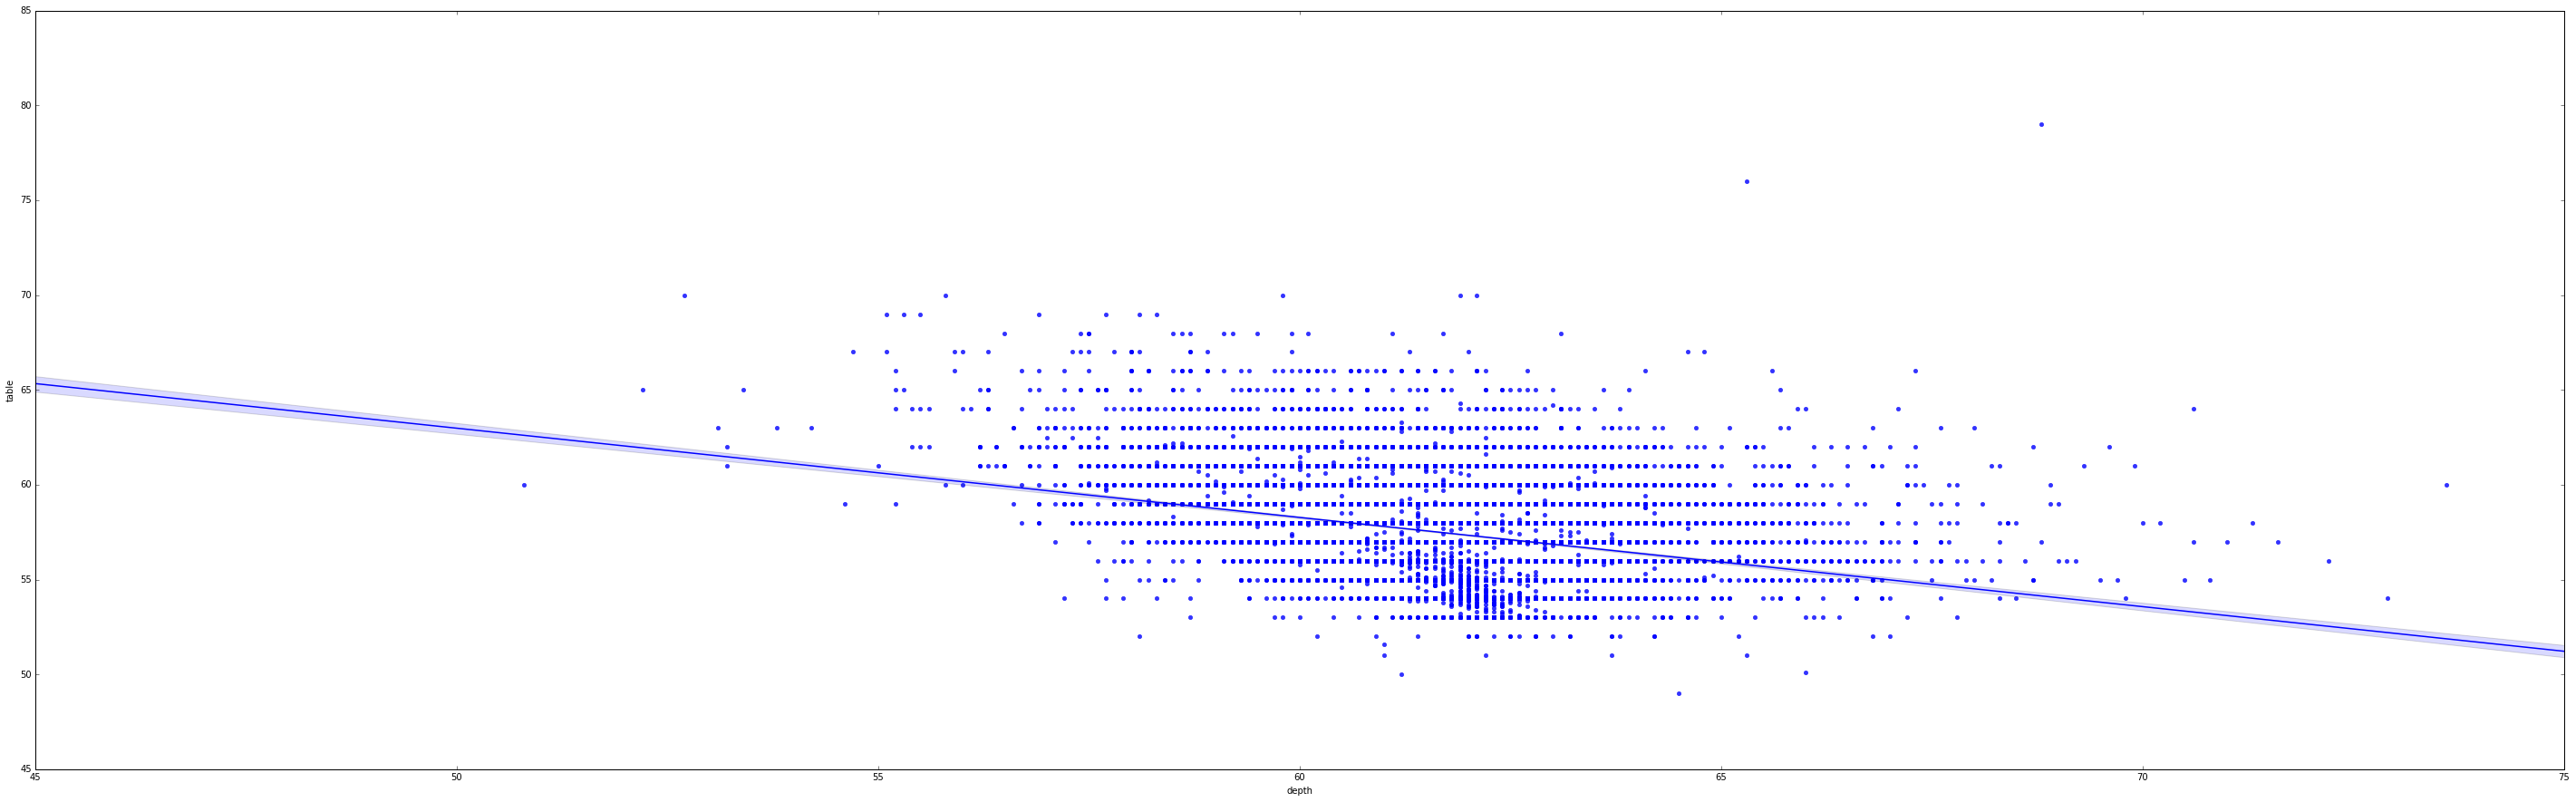

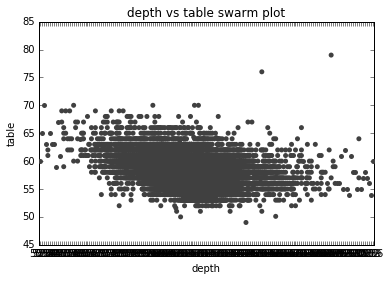

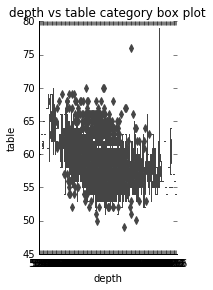

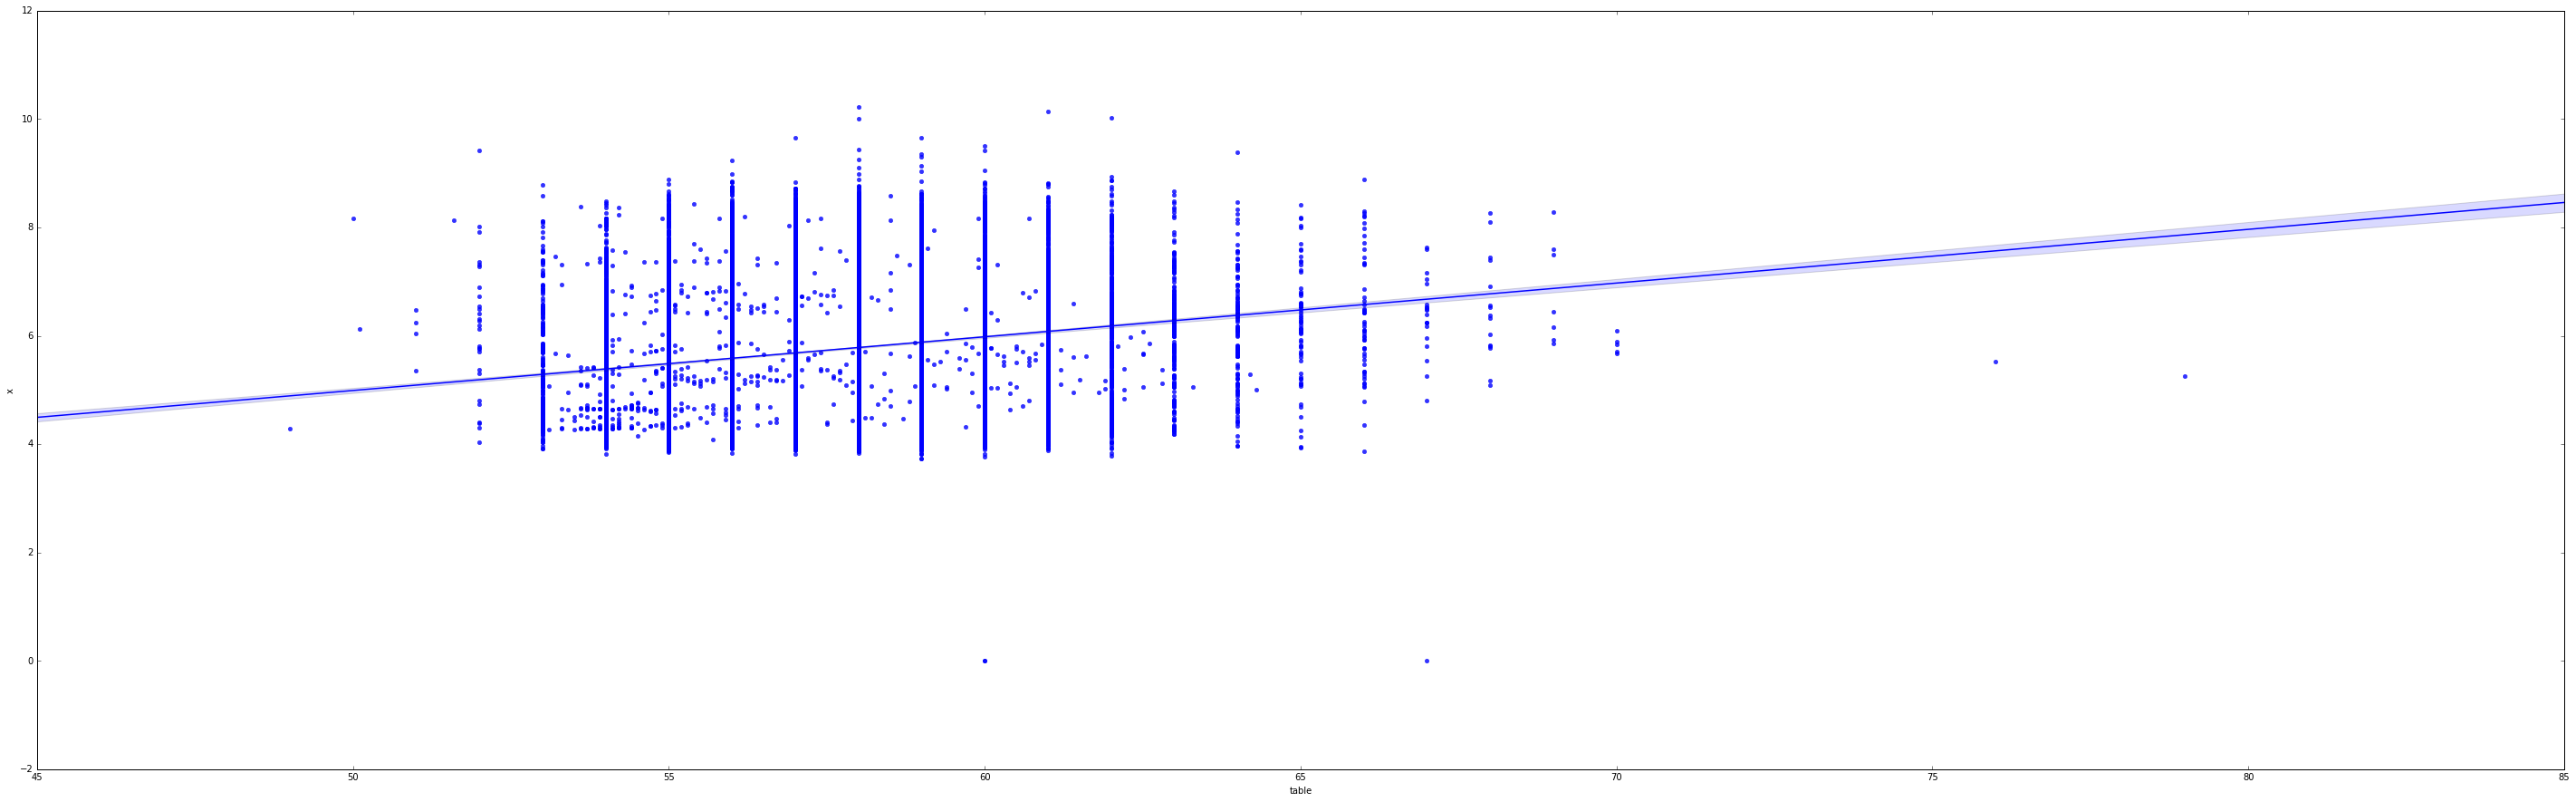

KeyboardInterrupt: 

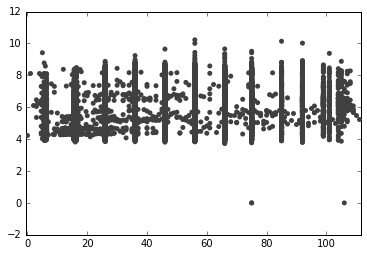

In [15]:
def regrswamcatplot(data):
        colnames=list(data.columns.values)
        for i in range(0,6):
            figure = plt.figure(figsize=(50,15))
            sns.regplot(x=colnames[i], y=colnames[i+1], data=data)
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
            
            sns.swarmplot(x=colnames[i], y=colnames[i+1], data=data,color=".25")
            plt.title(colnames[i]+ " vs "+colnames[i+1]+" swarm plot")
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
            
            sns.catplot(x=colnames[i], y=colnames[i+1],data=data, kind="box",height=4, aspect=.7)
            plt.title(colnames[i]+ " vs "+colnames[i+1]+" category box plot")
            plt.xlabel(colnames[i])
            plt.ylabel(colnames[i+1])
            plt.show()
regrswamcatplot(cust_dropna_copy)

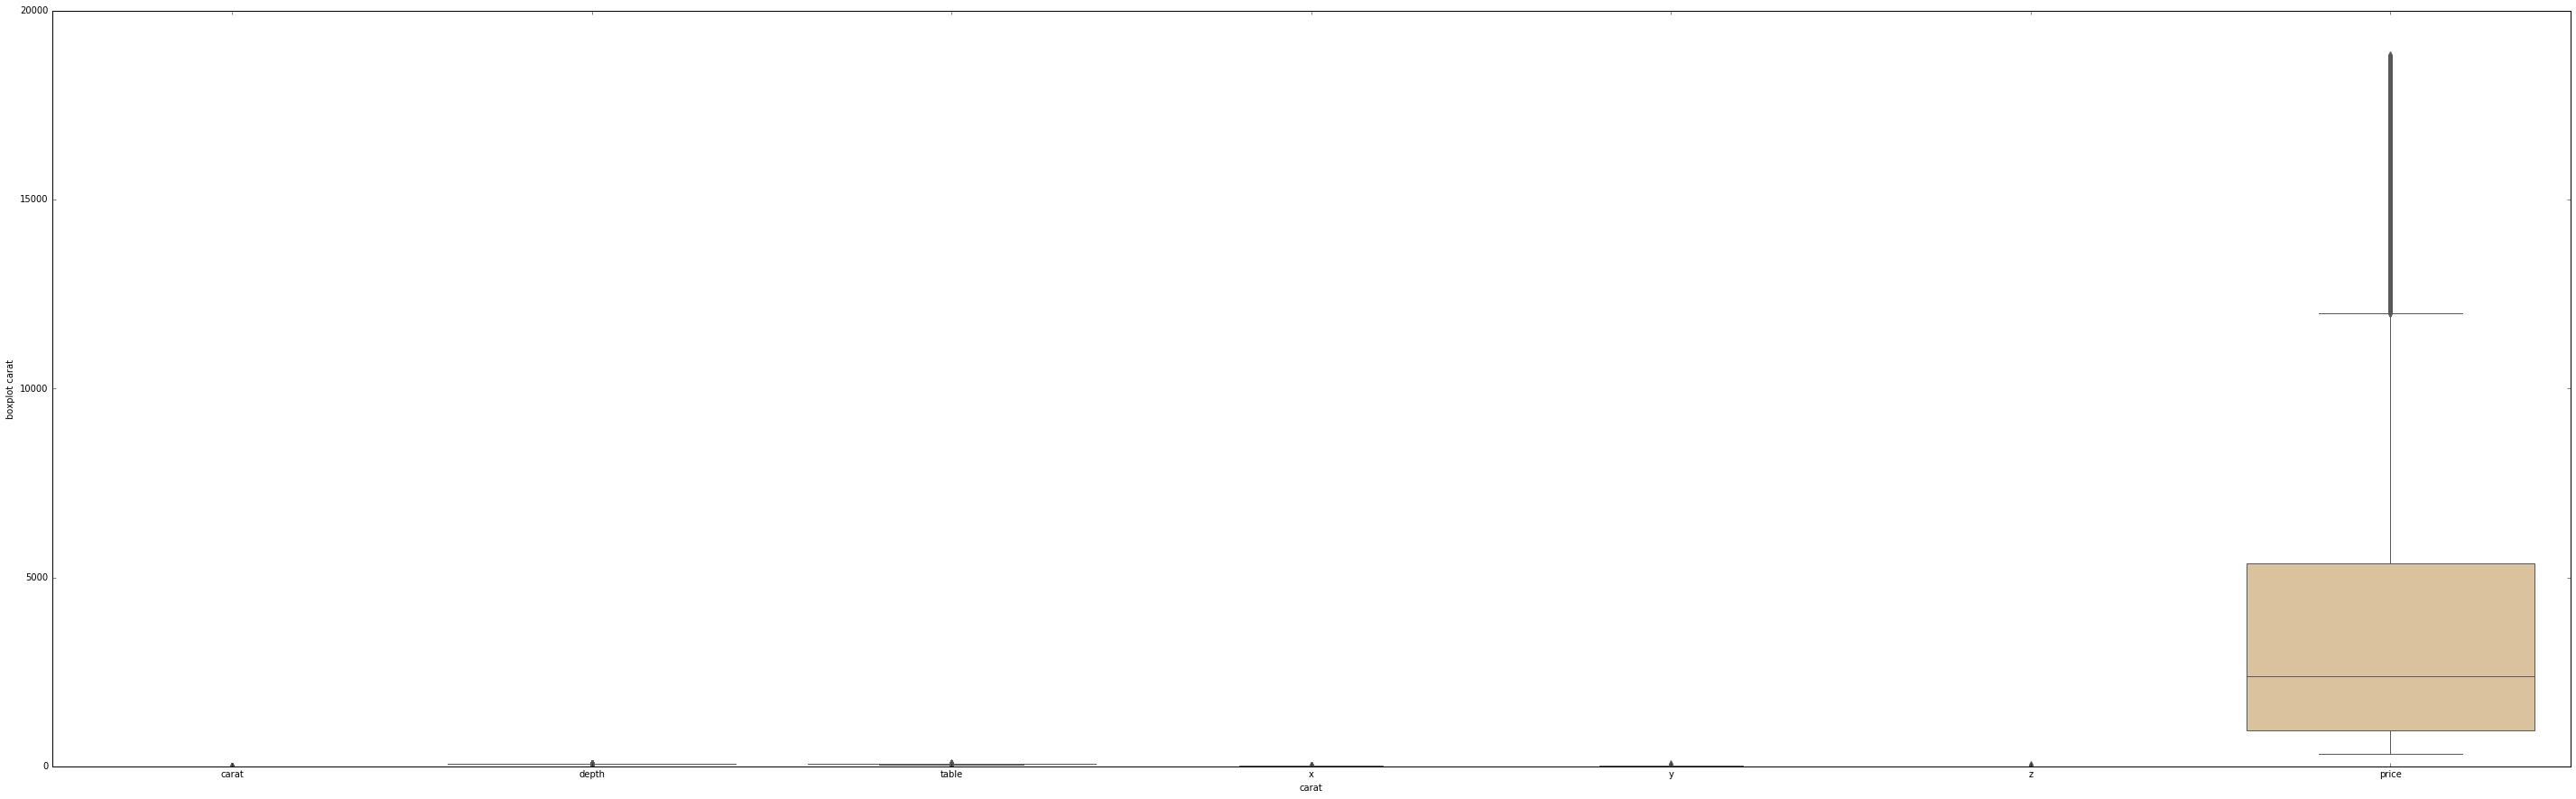

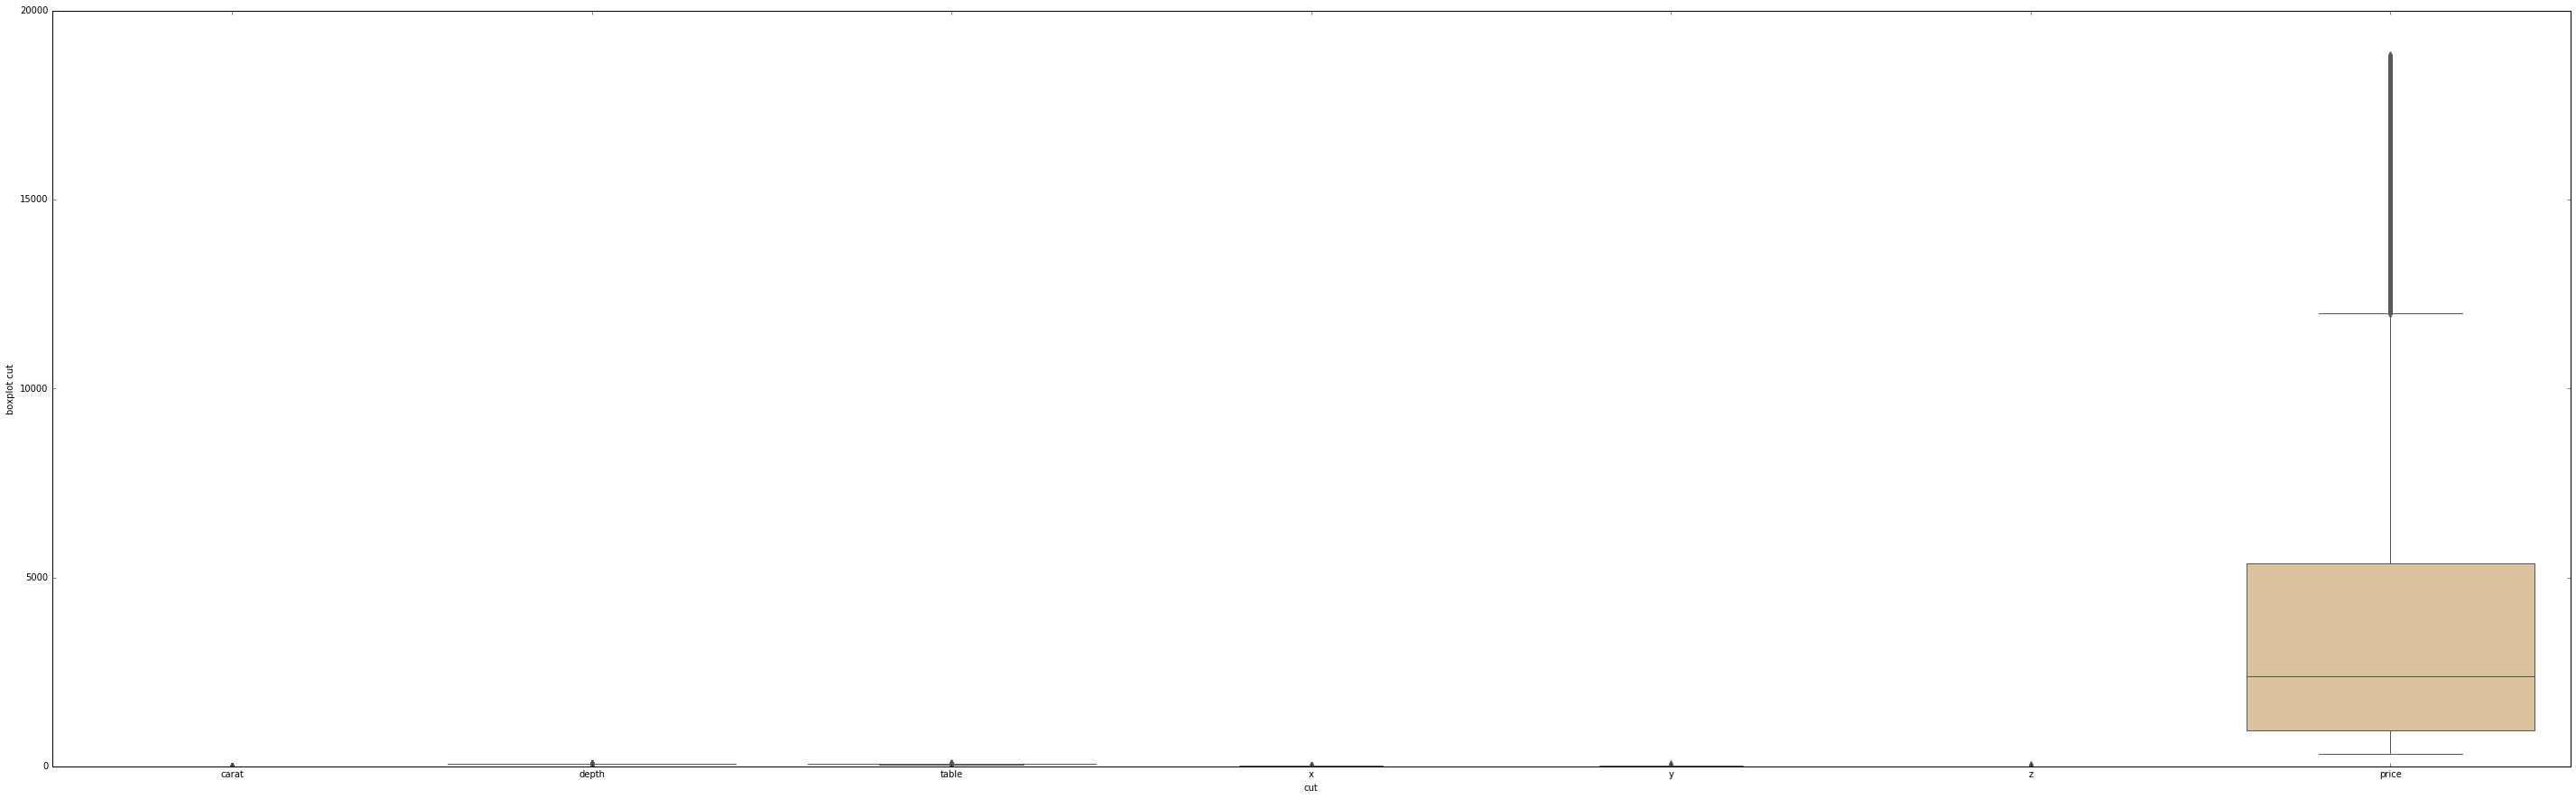

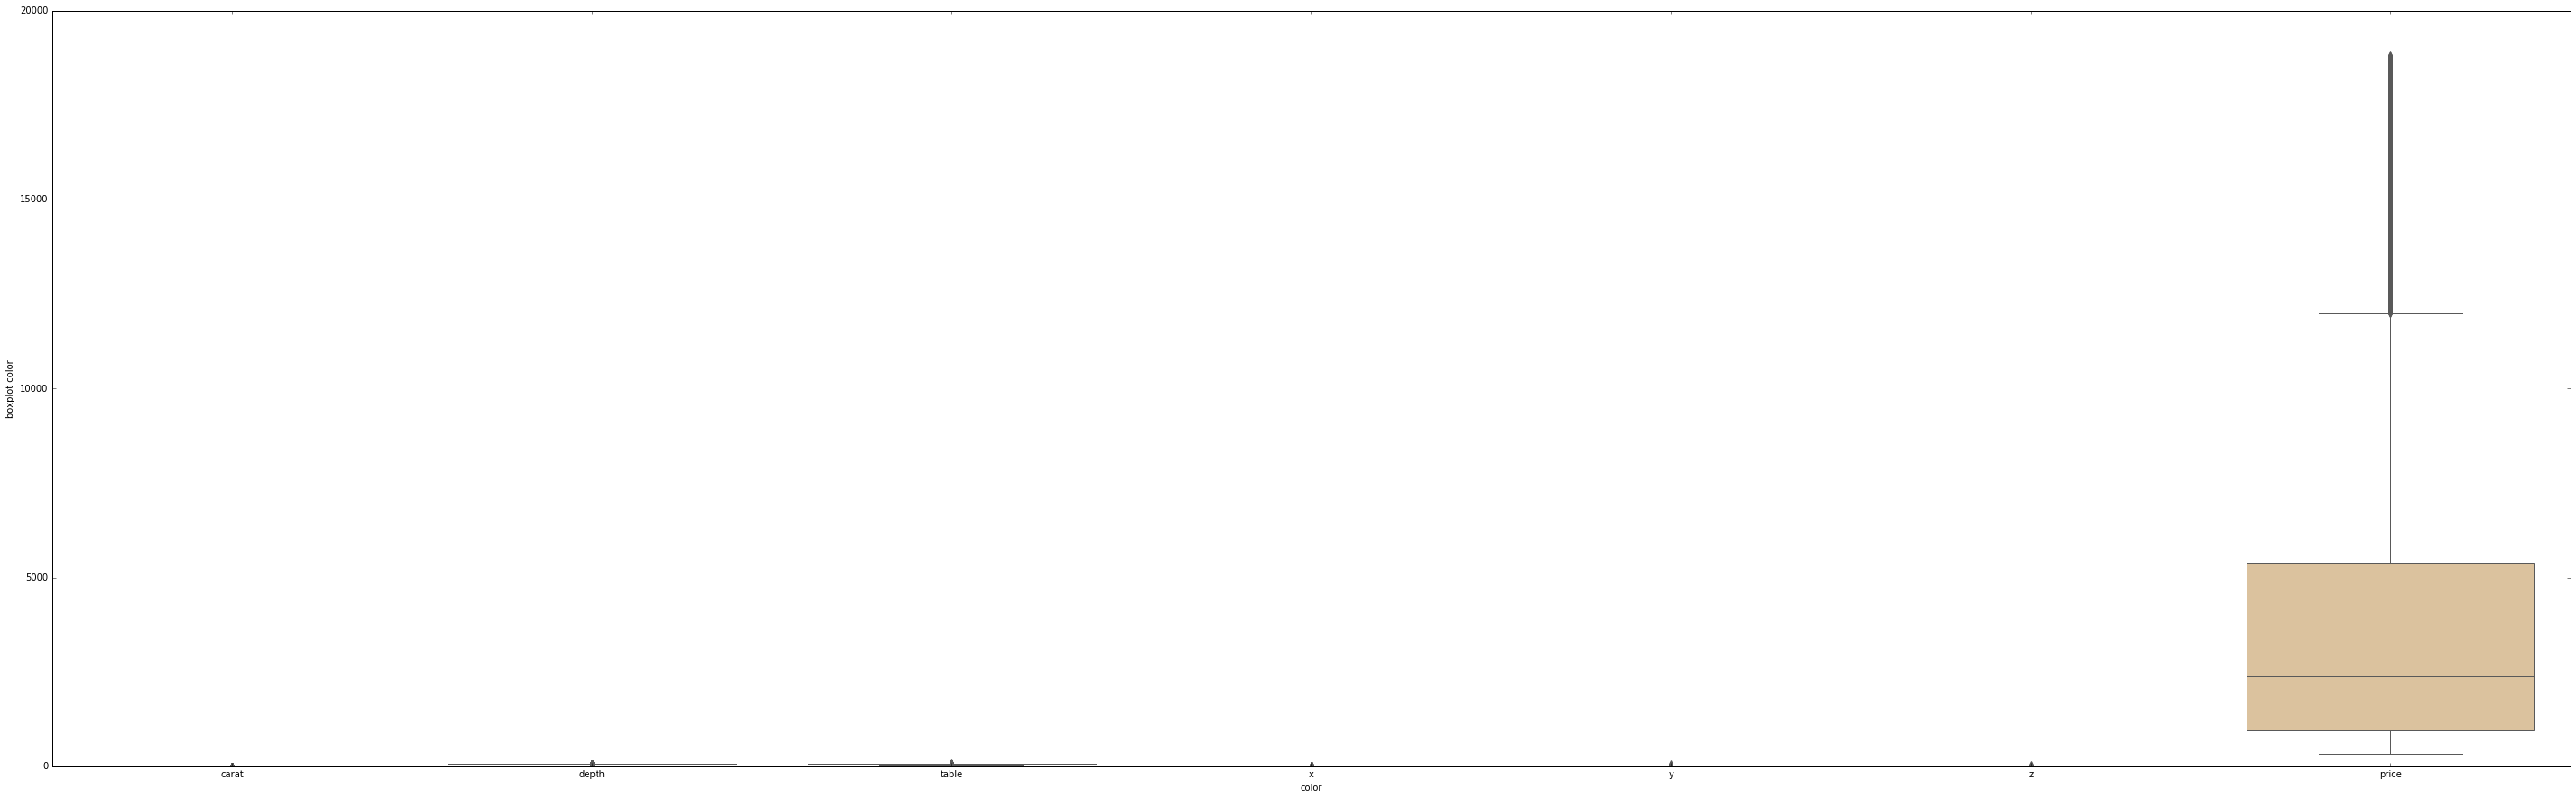

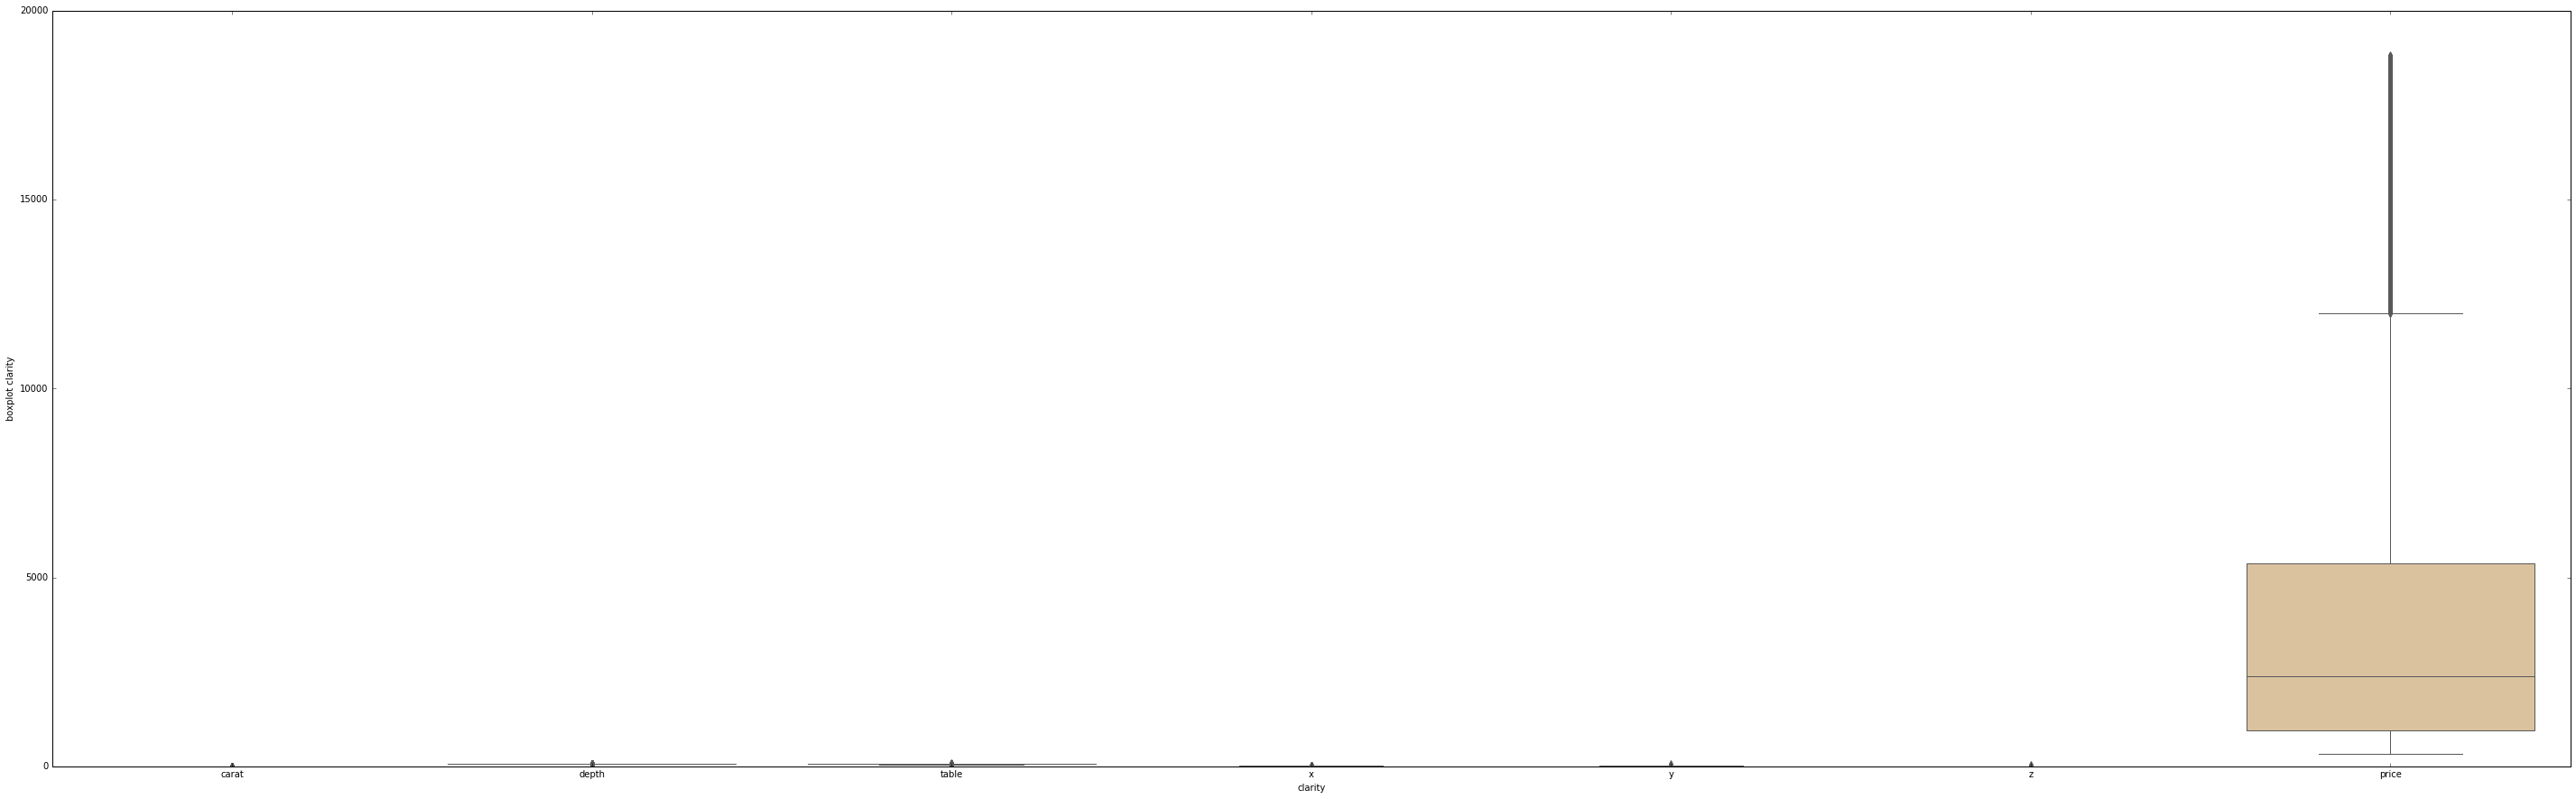

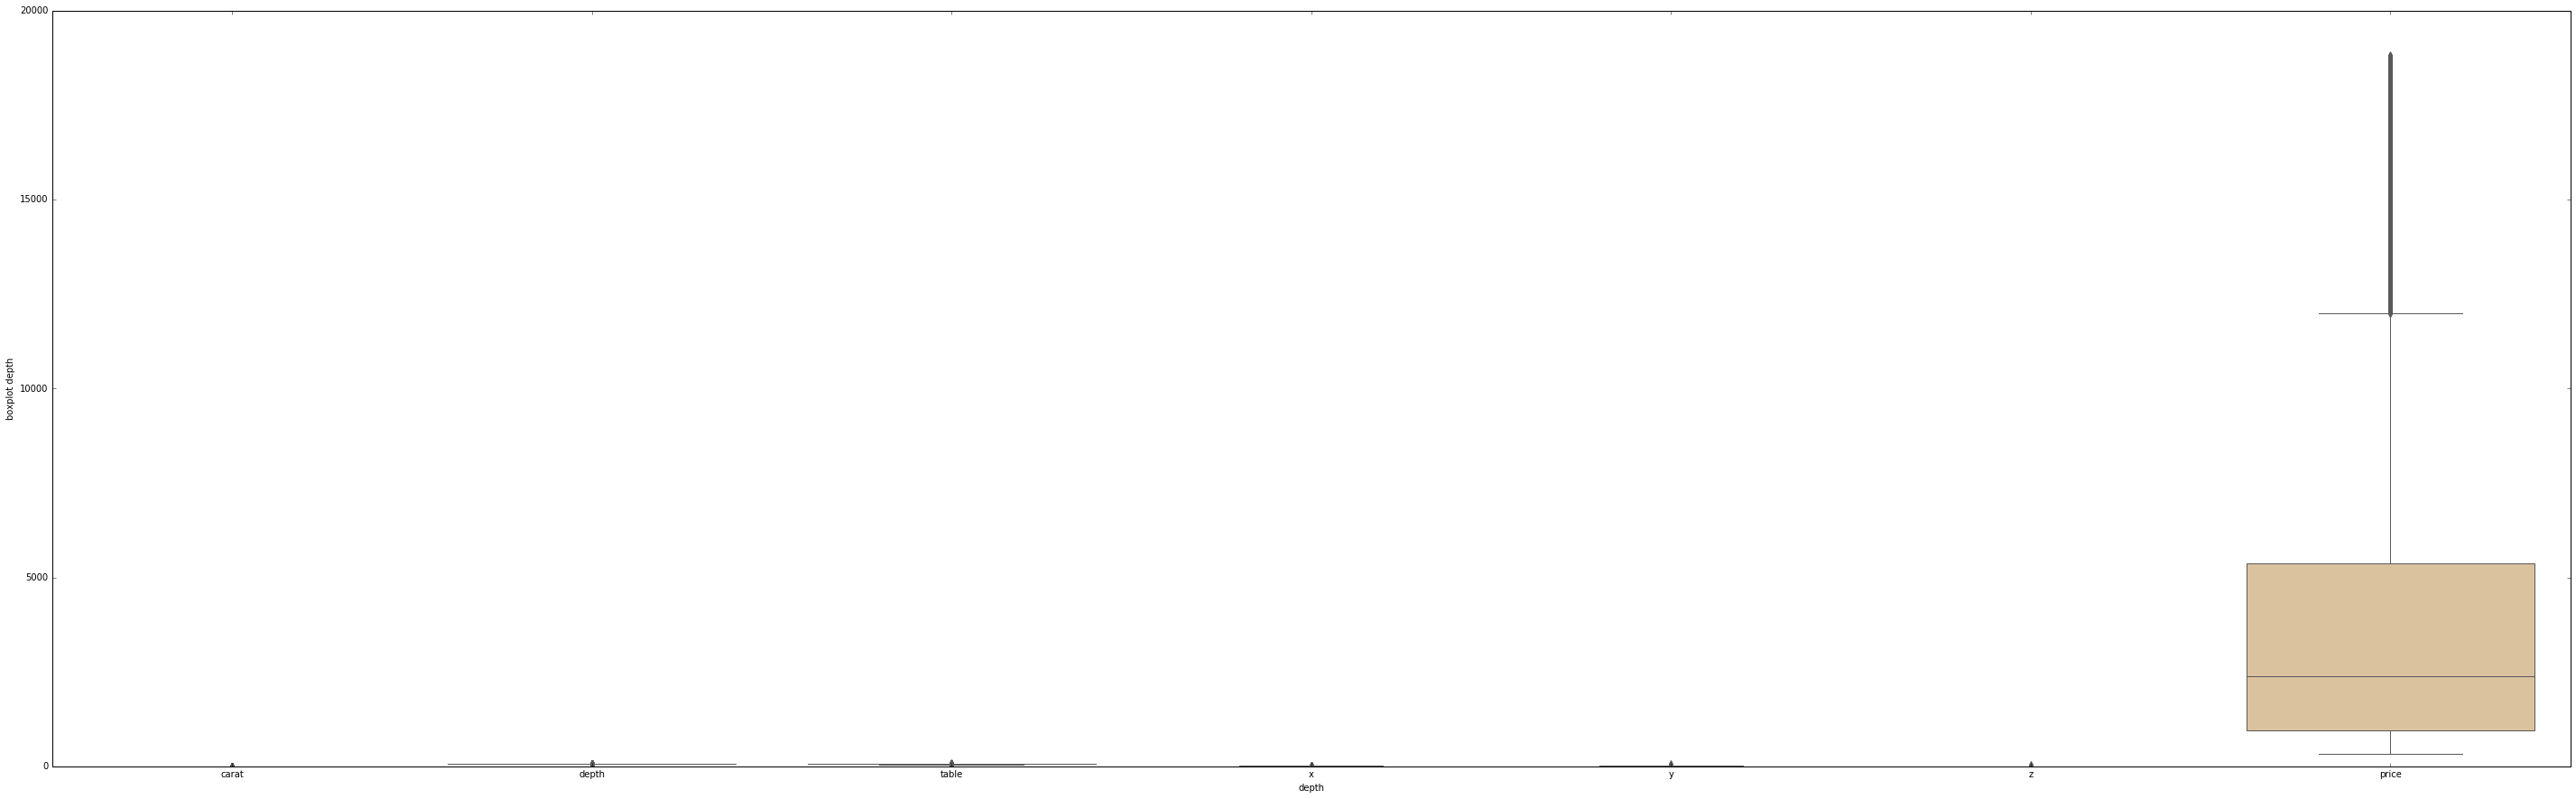

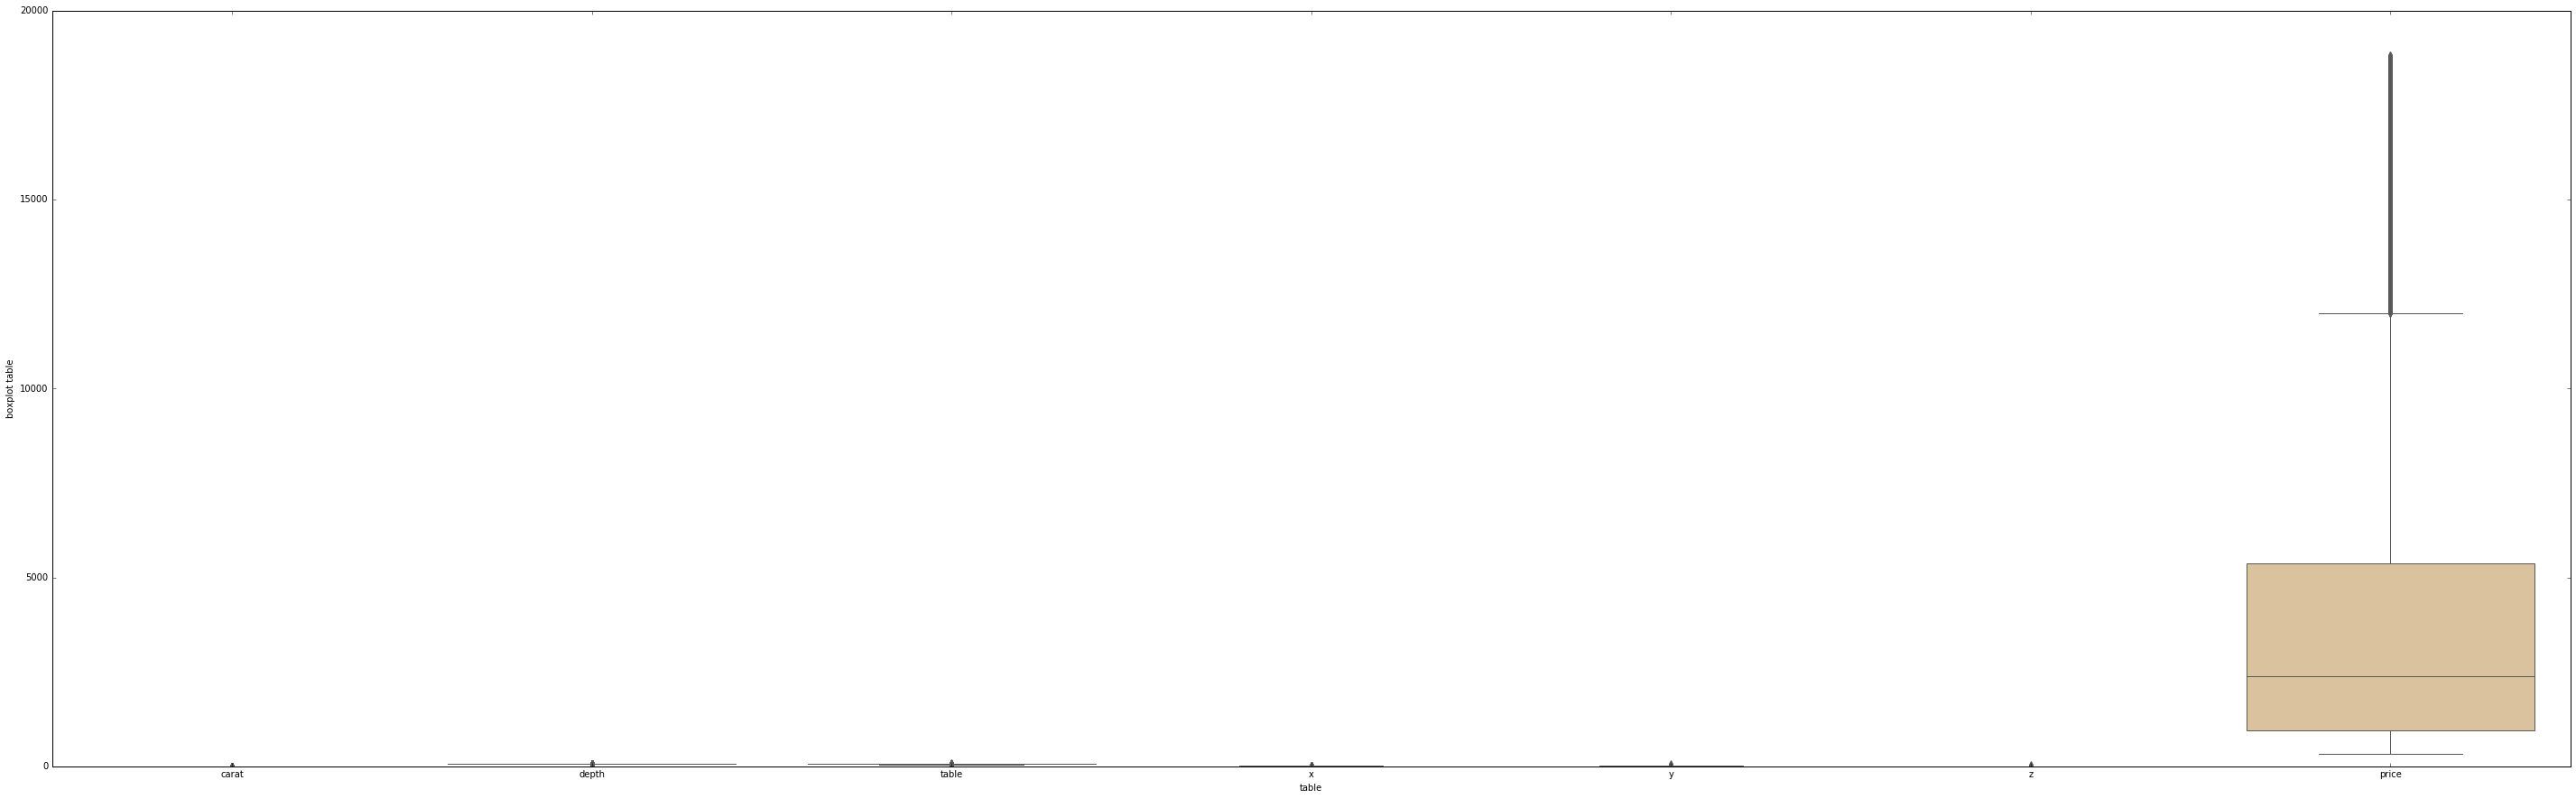

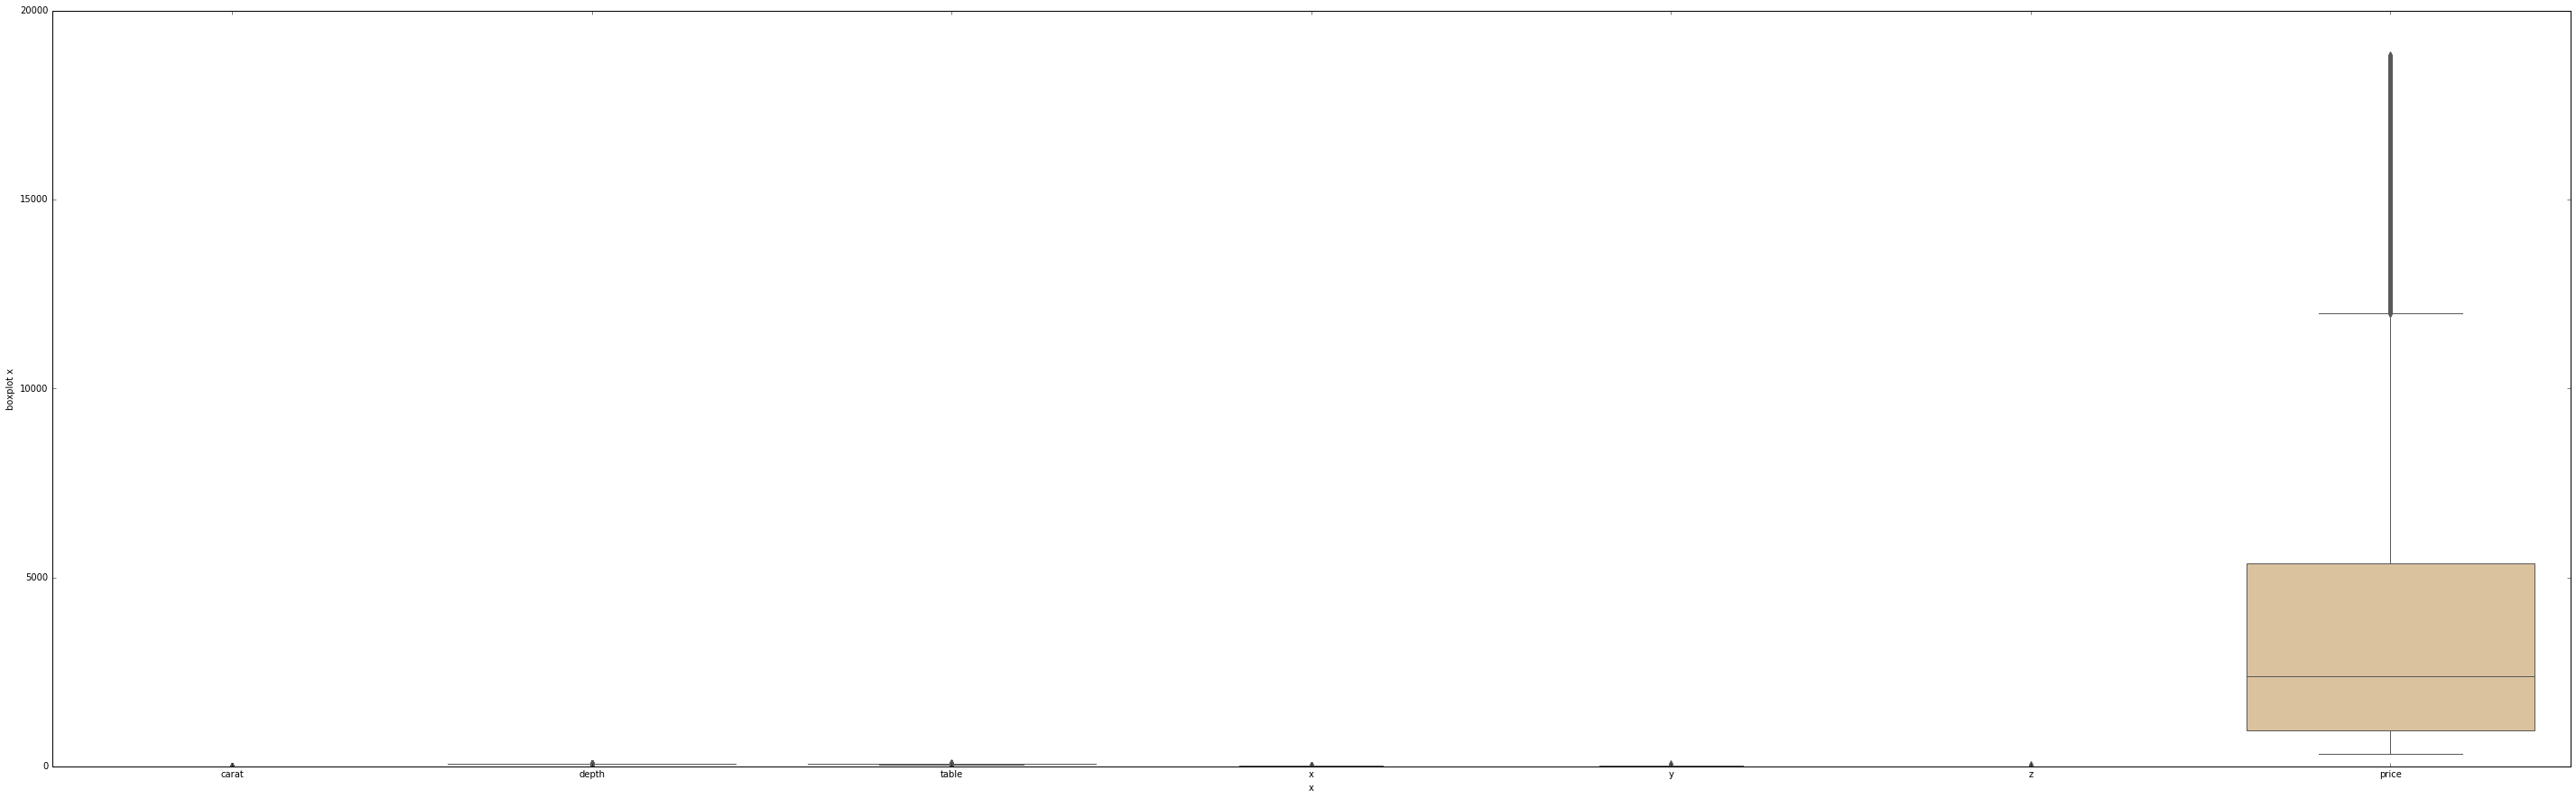

In [17]:
def boxplot(data):
        colnames=list(data.columns.values)
        for i in range(0,7):
            figure = plt.figure(figsize=(50,15))
            sns.boxplot(data=data, orient="v", palette="Set2")
            plt.xlabel(colnames[i])
            plt.ylabel("boxplot "+colnames[i])
            plt.show()
boxplot(data)

In [4]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [5]:
data = pd.get_dummies(data, columns=['cut','color','clarity'])
for column in data.columns:
    if data[column].dtype != 'object':
        mean = data[column].mean()
        data[column] = data[column].fillna(mean)

In [6]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

34
0


In [7]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Before removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
def remove_outlier(col):
        sorted(col)
        Q1,Q3=np.percentile(col,[25,75])
        IQR=Q3-Q1
        lower_range= Q1-(1.5 * IQR)
        upper_range= Q3+(1.5 * IQR)
        return lower_range, upper_range
def outlrem():
        print(data.shape)
        for column in data.iloc[:, 0:data.shape[1]].columns:
            lr,ur=remove_outlier(data[column])
            data[column]=np.where(data[column]>ur,ur,data[column])
            data[column]=np.where(data[column]<lr,lr,data[column])

        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        print("After removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
outlrem()
print("isnull sum\n",data.isnull().sum())
print("isna sum\n",data.isna().sum())
data.rename(columns = {'cut_Very Good':'cut_Very_Good'}, inplace = True)
print(data.head(5))
data.to_csv('D:/GL/Total DS Codes2/Pred Model/Assignment Project/Final Files/cubic_zirconia1.csv')

Before removing Outlier sum
 carat             657
depth            1413
table             318
x                  14
y                  14
z                  22
price            1778
cut_Fair          780
cut_Good         2435
cut_Ideal           0
cut_Premium         0
cut_Very Good    6027
color_D          3341
color_E          4916
color_F          4723
color_G          5653
color_H          4095
color_I          2765
color_J          1440
clarity_I1        364
clarity_IF        891
clarity_SI1      6565
clarity_SI2      4564
clarity_VS1      4087
clarity_VS2      6093
clarity_VVS1     1839
clarity_VVS2     2530
dtype: int64
(26933, 27)
After removing Outlier sum
 carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
c

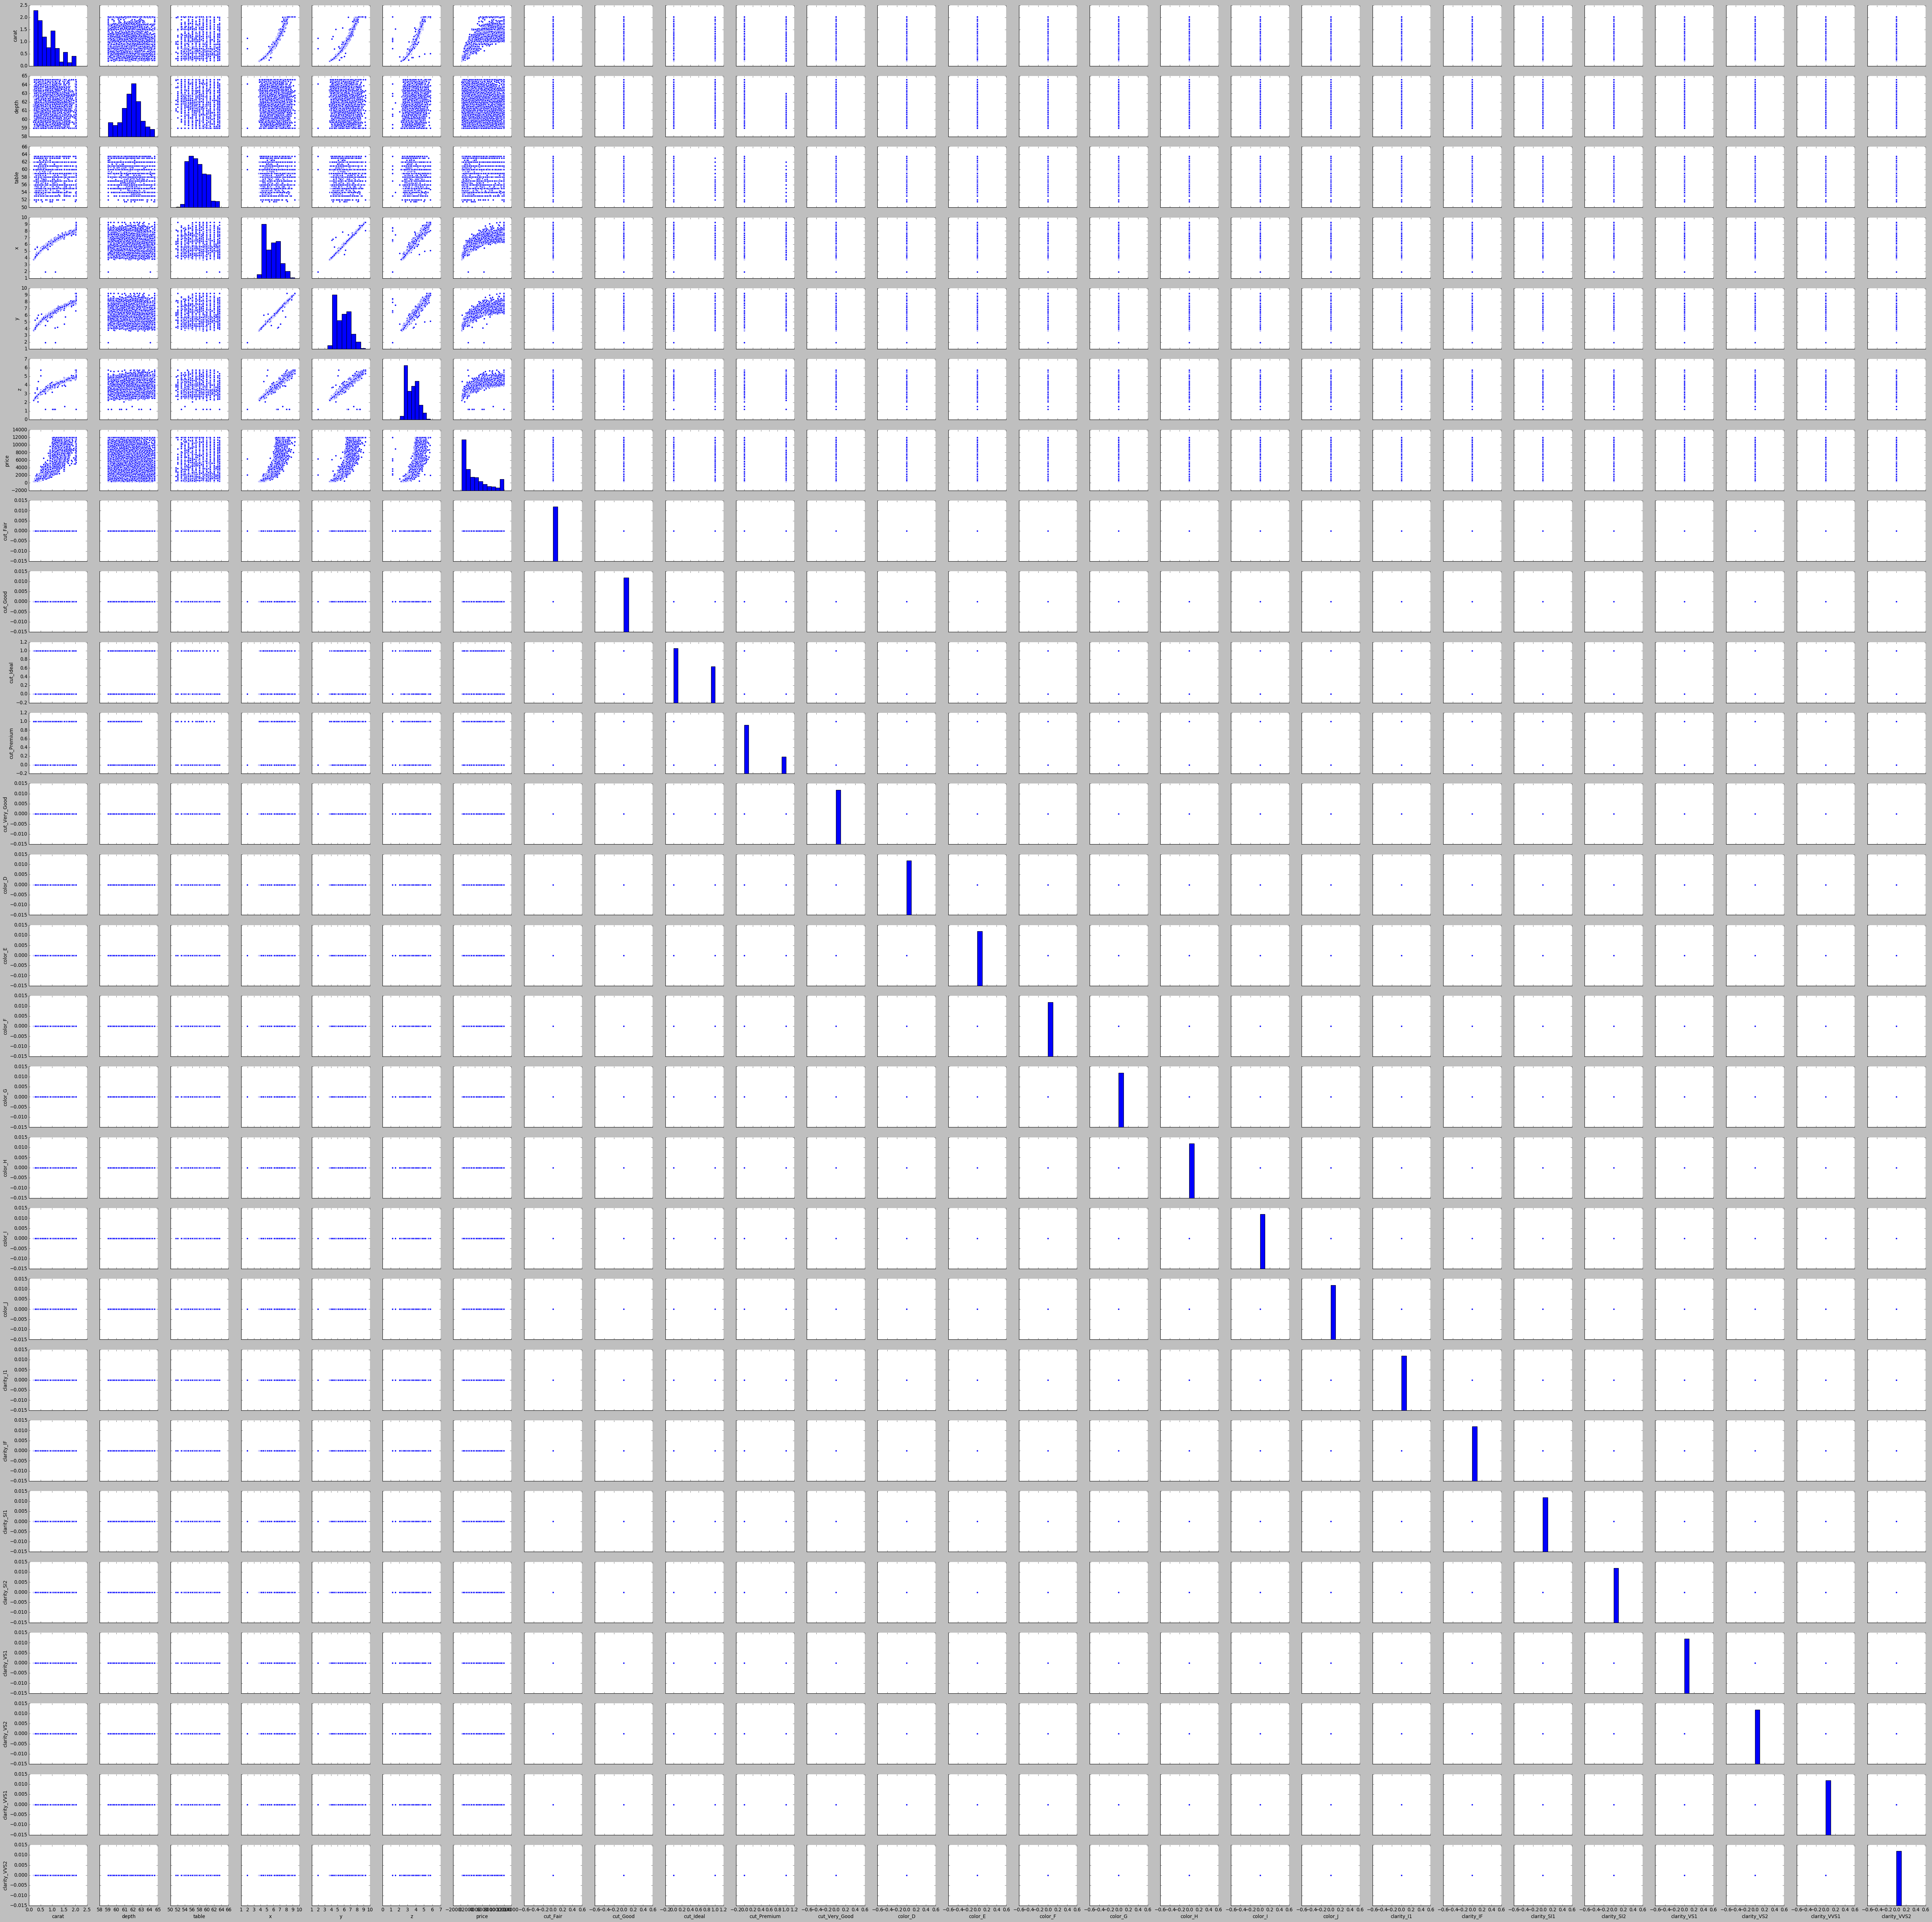

In [12]:
pairdata=pd.read_csv("D:/GL/Total DS Codes2/Pred Model/Assignment Project/Final Files/cubic_zirconia1.csv")
sns.pairplot(pairdata)
plt.show()

In [23]:
        print(data.shape)
        X = data.drop(data.iloc[:, 6:(data.shape[0]+1)], axis = 1)
#     X = data.drop('price', axis=1)
        # Copy target into the y dataframe. 
        y = data[['price']]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
        regression_model = LinearRegression()
        regression_model.fit(X_train, y_train)
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
        intercept = regression_model.intercept_[0]
        print(regression_model.score(X_train, y_train))
        print(regression_model.score(X_test, y_test))
        print("The intercept for our model is {}".format(intercept))

(26933, 27)
The coefficient for carat is 9025.982782803356
The coefficient for depth is -132.21985645251644
The coefficient for table is -78.82630784204005
The coefficient for x is -2509.42103295728
The coefficient for y is 1918.1207083070533
The coefficient for z is -300.724667823786
0.882552962685523
0.8875005134329862
The intercept for our model is 13720.865232358778


Intercept    13720.865232
carat         9025.982783
depth         -132.219856
table          -78.826308
x            -2509.421033
y             1918.120708
z             -300.724668
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 2.360e+04
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:56:23   Log-Likelihood:            -1.6023e+05
No. Observations:               18853   AIC:                         3.205e+05
Df Residuals:                   18846   BIC:                         3.205e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
             

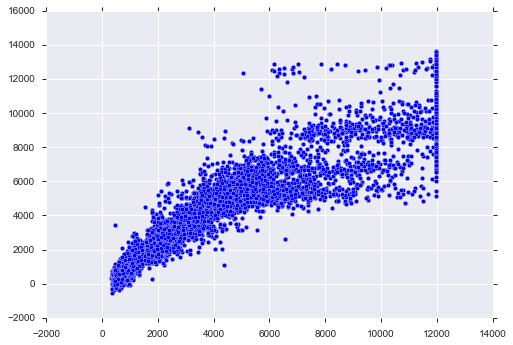

In [24]:
        data_train = pd.concat([X_train, y_train], axis=1)
        # Renaming columns for simplicity
#         lm1 = smf.ols(formula= 'price ~ carat+depth+table+x +y+z+cut_Fair+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_D+color_E+color_F+color_G+color_H+color_I+color_J+clarity_I1 +clarity_IF +clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2 ', data = data_train).fit()
#         lm1 = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = data_train).fit()
        lm1 = smf.ols(formula= 'price ~ carat  + depth + table + x + y + z', data = data_train).fit()
        print(lm1.params)
        print(lm1.summary())
        # Calculate MSE
        mse = np.mean((regression_model.predict(X_test)-y_test)**2)
        print(math.sqrt(mse))
        mse1 = np.mean((regression_model.predict(X_train)-y_train)**2)
        print(math.sqrt(mse1))
        # Prediction on Test data
        y_pred = regression_model.predict(X_test)
        plt.scatter(y_test['price'], y_pred)
        plt.show()

In [25]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [26]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
intercept = regression_model.intercept_[0]
print(regression_model.score(X_train_scaled, y_train_scaled))
print(regression_model.score(X_test_scaled, y_test_scaled))
print("The intercept for our model is {}".format(intercept))

The coefficient for carat is 1.1983438069357182
The coefficient for depth is -0.046172848164805894
The coefficient for table is -0.048984224763733784
The coefficient for x is -0.8125257356642107
The coefficient for y is 0.6167691727484156
The coefficient for z is -0.06024666256243433
0.882552962685523
0.887608837998723
The intercept for our model is 3.80706682431236e-16


Intercept   -9.540979e-18
carat        1.198344e+00
depth       -4.617285e-02
table       -4.898422e-02
x           -8.125257e-01
y            6.167692e-01
z           -6.024666e-02
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 2.360e+04
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:56:24   Log-Likelihood:                -6561.9
No. Observations:               18853   AIC:                         1.314e+04
Df Residuals:                   18846   BIC:                         1.319e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
             

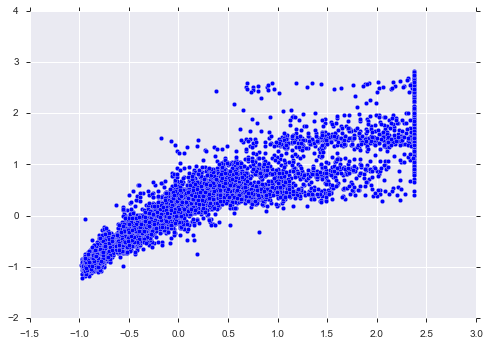

In [27]:
        data_train = pd.concat([X_train_scaled, y_train_scaled], axis=1)
        # Renaming columns for simplicity
#         lm1 = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = data_train).fit()
        lm1 = smf.ols(formula= 'price ~ carat  + depth + table + x + y + z', data = data_train).fit()
        print(lm1.params)
        print(lm1.summary())
        # Calculate MSE
        mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)
        print(math.sqrt(mse))
        # Prediction on Test data
        y_pred = regression_model.predict(X_test_scaled)
        plt.scatter(y_test_scaled['price'], y_pred)
        plt.show()

In [28]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 108.97061386110748
depth ---> 808.5893121590076
table ---> 646.4216961006114
x ---> 9982.964893422402
y ---> 9190.64909828864
z ---> 1760.7377851112815


In [7]:
        print(data.shape)
#         X = data.drop(data.iloc[:, 6:(data.shape[0]+1)], axis = 1)
        X = data.drop('price', axis=1)
        # Copy target into the y dataframe. 
        y = data[['price']]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
        regression_model = LinearRegression()
        regression_model.fit(X_train, y_train)
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
        intercept = regression_model.intercept_[0]
        print(regression_model.score(X_train, y_train))
        print(regression_model.score(X_test, y_test))
        print("The intercept for our model is {}".format(intercept))

(26933, 27)
The coefficient for carat is 9006.923158594956
The coefficient for depth is -96.33415054331653
The coefficient for table is -46.811345249223514
The coefficient for x is -2855.1209130233547
The coefficient for y is 2279.608471437586
The coefficient for z is -305.96577241880703
The coefficient for cut_Fair is 5.229594535194337e-12
The coefficient for cut_Good is 0.0
The coefficient for cut_Ideal is 302.960445290236
The coefficient for cut_Premium is 183.88026460795666
The coefficient for cut_Very_Good is 0.0
The coefficient for color_D is 0.0
The coefficient for color_E is 0.0
The coefficient for color_F is 0.0
The coefficient for color_G is 0.0
The coefficient for color_H is 0.0
The coefficient for color_I is 0.0
The coefficient for color_J is 0.0
The coefficient for clarity_I1 is 0.0
The coefficient for clarity_IF is 0.0
The coefficient for clarity_SI1 is 0.0
The coefficient for clarity_SI2 is 0.0
The coefficient for clarity_VS1 is 0.0
The coefficient for clarity_VS2 is 0.0

Intercept        9.440176e+03
carat            9.006923e+03
depth           -9.633415e+01
table           -4.681135e+01
x               -2.855121e+03
y                2.279608e+03
z               -3.059658e+02
cut_Fair        -2.381070e-13
cut_Good         0.000000e+00
cut_Ideal        3.029604e+02
cut_Premium      1.838803e+02
cut_Very_Good    0.000000e+00
color_D          0.000000e+00
color_E          0.000000e+00
color_F          0.000000e+00
color_G          0.000000e+00
color_H          0.000000e+00
color_I          0.000000e+00
color_J          0.000000e+00
clarity_I1       0.000000e+00
clarity_IF       0.000000e+00
clarity_SI1      0.000000e+00
clarity_SI2      0.000000e+00
clarity_VS1      0.000000e+00
clarity_VS2      0.000000e+00
clarity_VVS1     0.000000e+00
clarity_VVS2     0.000000e+00
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:           

C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Thiyaneswaran_Manoha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


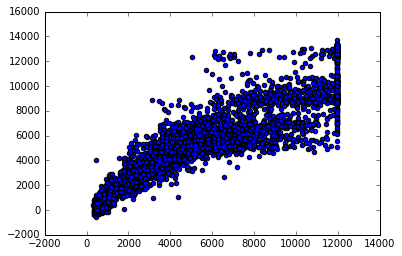

In [9]:
        data_train = pd.concat([X_train, y_train], axis=1)
        # Renaming columns for simplicity
        lm1 = smf.ols(formula= 'price ~ carat+depth+table+x +y+z+cut_Fair+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_D+color_E+color_F+color_G+color_H+color_I+color_J+clarity_I1 +clarity_IF +clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2 ', data = data_train).fit()
#         lm1 = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = data_train).fit()
#         lm1 = smf.ols(formula= 'price ~ carat  + depth + table + x + y + z', data = data_train).fit()
        print(lm1.params)
        print(lm1.summary())
        # Calculate MSE
        mse = np.mean((regression_model.predict(X_test)-y_test)**2)
        print(math.sqrt(mse))
        # Prediction on Test data
        y_pred = regression_model.predict(X_test)
        plt.scatter(y_test['price'], y_pred)
        plt.show()

In [11]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 30:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 110.6655255364971
depth ---> 1003.5730739049922
table ---> 865.8663606058542
x ---> 11228.7318188772
y ---> 10190.129118598301
z ---> 1909.1037173885836
cut_Fair ---> nan
cut_Good ---> nan
cut_Ideal ---> 2.7066400551354826
cut_Premium ---> 2.0388122541321914
cut_Very_Good ---> nan
color_D ---> nan
color_E ---> nan
color_F ---> nan
color_G ---> nan
color_H ---> nan
color_I ---> nan
color_J ---> nan
clarity_I1 ---> nan
clarity_IF ---> nan
clarity_SI1 ---> nan
clarity_SI2 ---> nan
clarity_VS1 ---> nan
clarity_VS2 ---> nan
clarity_VVS1 ---> nan
clarity_VVS2 ---> nan
